# Sklearn Random Forest Regression for dp0 data

###### Load modules 

The following conditions apply:

 - env = biomass_zonal
 - data merged_slats_field_agb_dp1_start.csv

In [1]:


%matplotlib inline
import sklearn
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
import numpy as np
from random import sample
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.ensemble import ExtraTreesRegressor as etr
from sklearn.ensemble import GradientBoostingRegressor as gbr
from sklearn.ensemble import AdaBoostRegressor as abr
from sklearn.tree import DecisionTreeRegressor as dtr
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split

# import plotting and stats modules

import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy
import scipy.stats as sc
import numpy as np
from glob import glob

# stats module
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import variance_inflation_factor

from bokeh.io import output_notebook, output_file
from bokeh.plotting import figure, show, save
#%matplotlib inline

# Bokeh Libraries
# from bokeh.plotting import figure, show
# from bokeh.io import output_file
from bokeh.models import ColumnDataSource, NumeralTickFormatter, HoverTool


from sklearn.model_selection import cross_validate
#sklearn.model_selection.cross_validate
# from sklearn import cross_validation
from sklearn.metrics import explained_variance_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
#from sklearn.cross_validation import KFold
import pickle5 as Pickle

C:\Users\rmcgr\AppData\Roaming\Python\Python37\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Import data

In [9]:
date = "20230109"

In [10]:
#csv_file = r"F:\cdu\data\zonal_stats\output\merged_slats_field_nt_mosaic_clean_start_all_values.csv"
#csv_file = r"E:\cdu\data\zonal_stats\output\merged_slats_field_agb_dp1_start.csv"
csv_file = r"F:\cdu\data\zonal_stats\output\{0}\dja_dbi_dim_dis_dka_stc_h99a2_fpca2_dry_indicies_clean.csv".format(date)


## Set output file locations

In [11]:
output_ = r"F:\cdu\data\zonal_stats\output\{0}\plots".format(date)

In [12]:
if not os.path.isdir(output_):
    os.mkdir(output_)

In [13]:
# read as dataframe and copy
df1 = pd.read_csv(csv_file, header=0) # the first row is read in as the header for you columns
print(df1.shape) # prints out the number of rows and columns in your csv file 
print(list(df1))
df1.shape
df2 = df1.copy()

(167, 164)
['site', 'bio_agb_kg1ha', 'b1_dja_min', 'b1_dja_max', 'b1_dja_mean', 'b1_dja_med', 'b1_dja_std', 'b1_dja_p25', 'b1_dja_p50', 'b1_dja_p75', 'b1_dja_p95', 'b1_dja_p99', 'b1_dbi_min', 'b1_dbi_max', 'b1_dbi_mean', 'b1_dbi_med', 'b1_dbi_std', 'b1_dbi_p25', 'b1_dbi_p50', 'b1_dbi_p75', 'b1_dbi_p95', 'b1_dbi_p99', 'b2_dbi_min', 'b2_dbi_max', 'b2_dbi_mean', 'b2_dbi_med', 'b2_dbi_std', 'b2_dbi_p25', 'b2_dbi_p50', 'b2_dbi_p75', 'b2_dbi_p95', 'b2_dbi_p99', 'b3_dbi_min', 'b3_dbi_max', 'b3_dbi_mean', 'b3_dbi_med', 'b3_dbi_std', 'b3_dbi_p25', 'b3_dbi_p50', 'b3_dbi_p75', 'b3_dbi_p95', 'b3_dbi_p99', 'b4_dbi_min', 'b4_dbi_max', 'b4_dbi_mean', 'b4_dbi_med', 'b4_dbi_std', 'b4_dbi_p25', 'b4_dbi_p50', 'b4_dbi_p75', 'b4_dbi_p95', 'b4_dbi_p99', 'b5_dbi_min', 'b5_dbi_max', 'b5_dbi_mean', 'b5_dbi_med', 'b5_dbi_std', 'b5_dbi_p25', 'b5_dbi_p50', 'b5_dbi_p75', 'b5_dbi_p95', 'b5_dbi_p99', 'b6_dbi_min', 'b6_dbi_max', 'b6_dbi_mean', 'b6_dbi_med', 'b6_dbi_std', 'b6_dbi_p25', 'b6_dbi_p50', 'b6_dbi_p75', 'b6_

In [14]:
# drop_list = ['dis_one', 'dis_two', 'dis_three', 'dis_four', 'dis_five', 'dis_six', 'dis_seven', 'dis_eight', 'dis_nine', 'dis_ten',
#  'dka_jan', 'dka_feb', 'dka_mar', 'dka_april', 'dka_may', 'dka_june', 'dka_july', 'dka_aug', 'dka_sep', 'dka_oct', 'dka_nov', 'dka_dec',
#     'stc_one', 'stc_two', 'stc_three', 'stc_four', 'stc_five', 'stc_six', 'stc_seven', 'stc_eight', 'stc_nine', 'stc_ten', 'stc_elev', 
#     'stc_twelv', 'stc_thirt', 'stc_fourt', 'stc_fift', 'stc_sixt', 'stc_sevent', 'dka_sum', 'dka_sum.1', 'dka_sum.2', 'dka_sum.3', 
#              'stc_sum', 'stc_sum.1', 'stc_sum.2', 'stc_sum.3']


In [15]:
# # Drop multiple columns
# df2.drop(drop_list, axis = 1, inplace=True)

In [16]:
print(list(df2.columns))

['site', 'bio_agb_kg1ha', 'b1_dja_min', 'b1_dja_max', 'b1_dja_mean', 'b1_dja_med', 'b1_dja_std', 'b1_dja_p25', 'b1_dja_p50', 'b1_dja_p75', 'b1_dja_p95', 'b1_dja_p99', 'b1_dbi_min', 'b1_dbi_max', 'b1_dbi_mean', 'b1_dbi_med', 'b1_dbi_std', 'b1_dbi_p25', 'b1_dbi_p50', 'b1_dbi_p75', 'b1_dbi_p95', 'b1_dbi_p99', 'b2_dbi_min', 'b2_dbi_max', 'b2_dbi_mean', 'b2_dbi_med', 'b2_dbi_std', 'b2_dbi_p25', 'b2_dbi_p50', 'b2_dbi_p75', 'b2_dbi_p95', 'b2_dbi_p99', 'b3_dbi_min', 'b3_dbi_max', 'b3_dbi_mean', 'b3_dbi_med', 'b3_dbi_std', 'b3_dbi_p25', 'b3_dbi_p50', 'b3_dbi_p75', 'b3_dbi_p95', 'b3_dbi_p99', 'b4_dbi_min', 'b4_dbi_max', 'b4_dbi_mean', 'b4_dbi_med', 'b4_dbi_std', 'b4_dbi_p25', 'b4_dbi_p50', 'b4_dbi_p75', 'b4_dbi_p95', 'b4_dbi_p99', 'b5_dbi_min', 'b5_dbi_max', 'b5_dbi_mean', 'b5_dbi_med', 'b5_dbi_std', 'b5_dbi_p25', 'b5_dbi_p50', 'b5_dbi_p75', 'b5_dbi_p95', 'b5_dbi_p99', 'b6_dbi_min', 'b6_dbi_max', 'b6_dbi_mean', 'b6_dbi_med', 'b6_dbi_std', 'b6_dbi_p25', 'b6_dbi_p50', 'b6_dbi_p75', 'b6_dbi_p95', '

In [19]:
# select_carbon_df = df2[['site', 'date', 'c_agb_kg1ha', 'b1_dja_min', 'b1_dja_max', 'b1_dja_mean', 'b1_dja_med', 
#                  'b1_dja_std', 'b1_dja_p25', 'b1_dja_p50', 'b1_dja_p75', 'b1_dja_p95', 'b1_dja_p99', 'b1_dbi_min', 'b1_dbi_max', 
#                  'b1_dbi_mean', 'b1_dbi_med', 'b1_dbi_std', 'b1_dbi_p25', 'b1_dbi_p50', 'b1_dbi_p75', 'b1_dbi_p95', 'b1_dbi_p99', 
#                  'b2_dbi_min', 'b2_dbi_max', 'b2_dbi_mean', 'b2_dbi_med', 'b2_dbi_std', 'b2_dbi_p25', 'b2_dbi_p50', 'b2_dbi_p75', 
#                  'b2_dbi_p95', 'b2_dbi_p99', 'b3_dbi_min', 'b3_dbi_max', 'b3_dbi_mean', 'b3_dbi_med', 'b3_dbi_std', 'b3_dbi_p25', 
#                  'b3_dbi_p50', 'b3_dbi_p75', 'b3_dbi_p95', 'b3_dbi_p99', 'b4_dbi_min', 'b4_dbi_max', 'b4_dbi_mean', 'b4_dbi_med', 
#                  'b4_dbi_std', 'b4_dbi_p25', 'b4_dbi_p50', 'b4_dbi_p75', 'b4_dbi_p95', 'b4_dbi_p99', 'b5_dbi_min', 'b5_dbi_max', 
#                  'b5_dbi_mean', 'b5_dbi_med', 'b5_dbi_std', 'b5_dbi_p25', 'b5_dbi_p50', 'b5_dbi_p75', 'b5_dbi_p95', 'b5_dbi_p99', 
#                  'b6_dbi_min', 'b6_dbi_max', 'b6_dbi_mean', 'b6_dbi_med', 'b6_dbi_std', 'b6_dbi_p25', 'b6_dbi_p50', 'b6_dbi_p75', 
#                  'b6_dbi_p95', 'b6_dbi_p99', 'b1_dim_min', 'b1_dim_max', 'b1_dim_mean', 'b1_dim_med', 'b1_dim_std', 'b1_dim_p25', 
#                  'b1_dim_p50', 'b1_dim_p75', 'b1_dim_p95', 'b1_dim_p99', 'b2_dim_min', 'b2_dim_max', 'b2_dim_mean', 'b2_dim_med', 
#                  'b2_dim_std', 'b2_dim_p25', 'b2_dim_p50', 'b2_dim_p75', 'b2_dim_p95', 'b2_dim_p99', 'b3_dim_min', 'b3_dim_max', 
#                  'b3_dim_mean', 'b3_dim_med', 'b3_dim_std', 'b3_dim_p25', 'b3_dim_p50', 'b3_dim_p75', 'b3_dim_p95', 'b3_dim_p99', 
#                  'dis_min', 'dis_max', 'dis_mean', 'dis_med', 'dis_major', 'dis_minor', 'dka_min', 'dka_max', 'dka_mean', 'dka_med', 
#                  'dka_major', 'dka_minor', 'stc_min', 'stc_max', 'stc_mean', 'stc_med', 'stc_major', 'stc_minor', 'h99a2_min', 
#                  'h99a2_max', 'h99a2_mean', 'h99a2_med', 'h99a2_std', 'h99a2_p25', 'h99a2_p50', 'h99a2_p75', 'h99a2_p95', 
#                  'h99a2_p99', 'fpca2_min', 'fpca2_max', 'fpca2_mean', 'fpca2_med', 'fpca2_std', 'fpca2_p25', 'fpca2_p50', 
#                  'fpca2_p75', 'fpca2_p95', 'fpca2_p99', 'fpca2_imdate', 'ratio32m', 'ratio42m', 'ratio43m', 'ratio52m', 'ratio53m', 
#                  'ratio54m', 'ratio62m', 'ratio63m', 'ratio64m', 'ratio65m', 
#                  'GSAVIm', 'GNDVIm', 'CVIm', 'NDGIm', 'RIm', 'NBRm', 'NDIIm', 'GDVIm', 'MSAVIm', 'DVIm', 'SAVIm', 'NDVIm', 'MSRm']]

In [28]:
select_agb_df = df2[['site', 'bio_agb_kg1ha','b1_dja_min', 'b1_dja_max', 'b1_dja_mean', 'b1_dja_med', 
                 'b1_dja_std', 'b1_dja_p25', 'b1_dja_p50', 'b1_dja_p75', 'b1_dja_p95', 'b1_dja_p99', 'b1_dbi_min', 'b1_dbi_max', 
                 'b1_dbi_mean', 'b1_dbi_med', 'b1_dbi_std', 'b1_dbi_p25', 'b1_dbi_p50', 'b1_dbi_p75', 'b1_dbi_p95', 'b1_dbi_p99', 
                 'b2_dbi_min', 'b2_dbi_max', 'b2_dbi_mean', 'b2_dbi_med', 'b2_dbi_std', 'b2_dbi_p25', 'b2_dbi_p50', 'b2_dbi_p75', 
                 'b2_dbi_p95', 'b2_dbi_p99', 'b3_dbi_min', 'b3_dbi_max', 'b3_dbi_mean', 'b3_dbi_med', 'b3_dbi_std', 'b3_dbi_p25', 
                 'b3_dbi_p50', 'b3_dbi_p75', 'b3_dbi_p95', 'b3_dbi_p99', 'b4_dbi_min', 'b4_dbi_max', 'b4_dbi_mean', 'b4_dbi_med', 
                 'b4_dbi_std', 'b4_dbi_p25', 'b4_dbi_p50', 'b4_dbi_p75', 'b4_dbi_p95', 'b4_dbi_p99', 'b5_dbi_min', 'b5_dbi_max', 
                 'b5_dbi_mean', 'b5_dbi_med', 'b5_dbi_std', 'b5_dbi_p25', 'b5_dbi_p50', 'b5_dbi_p75', 'b5_dbi_p95', 'b5_dbi_p99', 
                 'b6_dbi_min', 'b6_dbi_max', 'b6_dbi_mean', 'b6_dbi_med', 'b6_dbi_std', 'b6_dbi_p25', 'b6_dbi_p50', 'b6_dbi_p75', 
                 'b6_dbi_p95', 'b6_dbi_p99', 'b1_dim_min', 'b1_dim_max', 'b1_dim_mean', 'b1_dim_med', 'b1_dim_std', 'b1_dim_p25', 
                 'b1_dim_p50', 'b1_dim_p75', 'b1_dim_p95', 'b1_dim_p99', 'b2_dim_min', 'b2_dim_max', 'b2_dim_mean', 'b2_dim_med', 
                 'b2_dim_std', 'b2_dim_p25', 'b2_dim_p50', 'b2_dim_p75', 'b2_dim_p95', 'b2_dim_p99', 'b3_dim_min', 'b3_dim_max', 
                 'b3_dim_mean', 'b3_dim_med', 'b3_dim_std', 'b3_dim_p25', 'b3_dim_p50', 'b3_dim_p75', 'b3_dim_p95', 'b3_dim_p99', 
                 'dis_min', 'dis_max', 'dis_mean', 'dis_med', 'dis_major', 'dis_minor', 'dka_min', 'dka_max', 'dka_mean', 'dka_med', 
                 'dka_major', 'dka_minor', 'stc_min', 'stc_max', 'stc_mean', 'stc_med', 'stc_major', 'stc_minor', 'h99a2_min', 
                 'h99a2_max', 'h99a2_mean', 'h99a2_med', 'h99a2_std', 'h99a2_p25', 'h99a2_p50', 'h99a2_p75', 'h99a2_p95', 
                 'h99a2_p99', 'fpca2_min', 'fpca2_max', 'fpca2_mean', 'fpca2_med', 'fpca2_std', 'fpca2_p25', 'fpca2_p50', 
                 'fpca2_p75', 'fpca2_p95', 'fpca2_p99', 'fpca2_imdate', 'ratio32m', 'ratio42m', 'ratio43m', 'ratio52m', 'ratio53m', 
                 'ratio54m', 'ratio62m', 'ratio63m', 'ratio64m', 'ratio65m', 
                 'GSAVIm', 'GNDVIm', 'CVIm', 'NDGIm', 'RIm', 'NBRm', 'NDIIm', 'GDVIm', 'MSAVIm', 'DVIm', 'SAVIm', 'NDVIm', 'MSRm']]

In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Columns: 164 entries, site to MSRm
dtypes: float64(139), int64(23), object(2)
memory usage: 214.1+ KB


### Set variables to plot

In [30]:
# predicted value is x
value_x = 'bio_agb_kg1ha'
# variable is y
value_y = "fpca2_p50"
value_a = 'h99a2_p95'
value_b = 'stc_med'


In [31]:
value_y

'fpca2_p50'

In [32]:
df2.shape

(167, 164)

In [33]:
def save_fig(value_x, value_y):
    # Output to file
    output_file(os.path.join(output_,'all_sites_{0}_{1}.html'.format(value_x, value_y)),
                title='Relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")))


    #Specify the selection tools to be made available
    select_tools = ['box_select', 'lasso_select', 'poly_select', 'tap', 'zoom_in', 'zoom_out', 'wheel_zoom', 'reset']

    #print(test)
    # Format the tooltip
    tooltips = [
                ('Site', '@site'),
                ('Date', '@date'),
                (value_x, '@{0}'.format(value_x)),
                (value_y, '@{0}'.format(value_y)),   
                (value_a, '@{0}'.format(value_a)),
                (value_b, '@{0}'.format(value_b)) 
               ]

    # Create the figure
    fig = figure(plot_height=400,
                 plot_width=1500,
                 y_axis_label= value_y.replace("_", " "), 
                 x_axis_label= value_x.replace("_", " "),
                 title='Relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")),
                 toolbar_location='below',
                 tools=select_tools)

    # # Format the y-axis tick label
    fig.yaxis[0].formatter = NumeralTickFormatter(format='0')

    # Add square representing each site
    fig.square(x= value_x,
               y= value_y,
               source=df2.round(4),
               size=5,
               color='royalblue',
               selection_color='deepskyblue',
               nonselection_color='lightgray',
               nonselection_alpha=0.3)

    # Add the HoverTool to the figure
    fig.add_tools(HoverTool(tooltips=tooltips))

    # Visualize
    save(fig)

In [34]:
save_fig(value_x, value_y)

In [35]:
column_list = select_agb_df.columns.to_list()
y_list = column_list[3:]
value_x = column_list[2:3][0]


for i in y_list:
    value_y = i
    save_fig(value_x, value_y)
    

In [36]:
print(column_list[3:])
print(column_list[2:3])

['b1_dja_max', 'b1_dja_mean', 'b1_dja_med', 'b1_dja_std', 'b1_dja_p25', 'b1_dja_p50', 'b1_dja_p75', 'b1_dja_p95', 'b1_dja_p99', 'b1_dbi_min', 'b1_dbi_max', 'b1_dbi_mean', 'b1_dbi_med', 'b1_dbi_std', 'b1_dbi_p25', 'b1_dbi_p50', 'b1_dbi_p75', 'b1_dbi_p95', 'b1_dbi_p99', 'b2_dbi_min', 'b2_dbi_max', 'b2_dbi_mean', 'b2_dbi_med', 'b2_dbi_std', 'b2_dbi_p25', 'b2_dbi_p50', 'b2_dbi_p75', 'b2_dbi_p95', 'b2_dbi_p99', 'b3_dbi_min', 'b3_dbi_max', 'b3_dbi_mean', 'b3_dbi_med', 'b3_dbi_std', 'b3_dbi_p25', 'b3_dbi_p50', 'b3_dbi_p75', 'b3_dbi_p95', 'b3_dbi_p99', 'b4_dbi_min', 'b4_dbi_max', 'b4_dbi_mean', 'b4_dbi_med', 'b4_dbi_std', 'b4_dbi_p25', 'b4_dbi_p50', 'b4_dbi_p75', 'b4_dbi_p95', 'b4_dbi_p99', 'b5_dbi_min', 'b5_dbi_max', 'b5_dbi_mean', 'b5_dbi_med', 'b5_dbi_std', 'b5_dbi_p25', 'b5_dbi_p50', 'b5_dbi_p75', 'b5_dbi_p95', 'b5_dbi_p99', 'b6_dbi_min', 'b6_dbi_max', 'b6_dbi_mean', 'b6_dbi_med', 'b6_dbi_std', 'b6_dbi_p25', 'b6_dbi_p50', 'b6_dbi_p75', 'b6_dbi_p95', 'b6_dbi_p99', 'b1_dim_min', 'b1_dim_max'

### Drop AGB numbers which are high

In [37]:
# # drop the 7 tern sites that apear to be outliers
# df3 =df2[df2[value_x] <= 100000]
# df3.to_csv(os.path.join(output_, "{0}_lt_100000.csv".format(value_x)))
# drop_sites =df2[df2[value_x] > 100000]
# drop_sites.value_counts(['site', value_x, value_y])


In [38]:
# df3.shape

In [39]:

# # Output to file
# output_file(os.path.join(output_, 'TERN7_removed_sites_{0}_{1}.html'.format(value_x, value_y)),
#             title='Seven TERN sites removed - relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")))


# #Specify the selection tools to be made available
# select_tools = ['box_select', 'lasso_select', 'poly_select', 'tap', 'zoom_in', 'zoom_out', 'wheel_zoom', 'reset']

# # Format the tooltip
# tooltips = [
#             ('Site', '@site'),
#             ('Date', '@date'),
#             (value_x, '@{0}'.format(value_x)),
#             (value_y, '@{0}'.format(value_y)),
#             (value_a, '@{0}'.format(value_a)),
#             (value_b, '@{0}'.format(value_b)) 
#            ]

# # Create the figure
# fig = figure(plot_height=400,
#              plot_width=1500,
#              y_axis_label= value_y.replace("_", " "), 
#              x_axis_label= value_x.replace("_", " "),
#              title='Seven TERN sites removed - relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")),
#              toolbar_location='below',
#              tools=select_tools)

# # # Format the y-axis tick label
# fig.yaxis[0].formatter = NumeralTickFormatter(format='0')

# # Add square representing each site
# fig.square(x= value_x,
#            y= value_y,
#            source=df3,
#            size=5,
#            color='royalblue',
#            selection_color='deepskyblue',
#            nonselection_color='lightgray',
#            nonselection_alpha=0.3)

# # Add the HoverTool to the figure
# fig.add_tools(HoverTool(tooltips=tooltips))

# # Visualize
# show(fig)

### Drop the TERN sites for review

In [40]:
# # drop the TERN sites due to 
# df4=df3[df3.site.apply(lambda x: len(str(x))<=9)]
# df4.to_csv(os.path.join(output_, "{0}_NTH_only_lt_100000.csv".format(value_x)))

In [41]:
# df4.sample(5)

In [42]:
# df4.shape

In [43]:

# # Output to file
# output_file(os.path.join(output_, 'ntg_sites_agb_{0}_{1}.html'.format(value_x, value_y)),
#             title='NTG sites only - relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")))

# #Specify the selection tools to be made available
# select_tools = ['box_select', 'lasso_select', 'poly_select', 'tap', 'zoom_in', 'zoom_out', 'wheel_zoom', 'reset']

# # Format the tooltip
# tooltips = [
#             ('Site', '@site'),
#             ('Date', '@date'),
#             (value_x, '@{0}'.format(value_x)),
#             (value_y, '@{0}'.format(value_y)),
#             (value_a, '@{0}'.format(value_a)),
#             (value_b, '@{0}'.format(value_b)) 
#            ]

# # Create the figure
# fig = figure(plot_height=400,
#              plot_width=1500,
#              y_axis_label= value_y.replace("_", " "), 
#              x_axis_label= value_x.replace("_", " "),
#              title='NTG sites only - relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")),
#              toolbar_location='below',
#              tools=select_tools)

# # # Format the y-axis tick label
# fig.yaxis[0].formatter = NumeralTickFormatter(format='0')

# # Add square representing each site
# fig.square(x= value_x,
#            y= value_y,
#            source=df4,
#            size=5,
#            color='royalblue',
#            selection_color='deepskyblue',
#            nonselection_color='lightgray',
#            nonselection_alpha=0.3)

# # Add the HoverTool to the figure
# fig.add_tools(HoverTool(tooltips=tooltips))

# # Visualize
# show(fig)

## Choose which data set to run the models from

In [44]:
df_ml = select_agb_df

In [45]:
print(list(df_ml.columns))

['site', 'bio_agb_kg1ha', 'b1_dja_min', 'b1_dja_max', 'b1_dja_mean', 'b1_dja_med', 'b1_dja_std', 'b1_dja_p25', 'b1_dja_p50', 'b1_dja_p75', 'b1_dja_p95', 'b1_dja_p99', 'b1_dbi_min', 'b1_dbi_max', 'b1_dbi_mean', 'b1_dbi_med', 'b1_dbi_std', 'b1_dbi_p25', 'b1_dbi_p50', 'b1_dbi_p75', 'b1_dbi_p95', 'b1_dbi_p99', 'b2_dbi_min', 'b2_dbi_max', 'b2_dbi_mean', 'b2_dbi_med', 'b2_dbi_std', 'b2_dbi_p25', 'b2_dbi_p50', 'b2_dbi_p75', 'b2_dbi_p95', 'b2_dbi_p99', 'b3_dbi_min', 'b3_dbi_max', 'b3_dbi_mean', 'b3_dbi_med', 'b3_dbi_std', 'b3_dbi_p25', 'b3_dbi_p50', 'b3_dbi_p75', 'b3_dbi_p95', 'b3_dbi_p99', 'b4_dbi_min', 'b4_dbi_max', 'b4_dbi_mean', 'b4_dbi_med', 'b4_dbi_std', 'b4_dbi_p25', 'b4_dbi_p50', 'b4_dbi_p75', 'b4_dbi_p95', 'b4_dbi_p99', 'b5_dbi_min', 'b5_dbi_max', 'b5_dbi_mean', 'b5_dbi_med', 'b5_dbi_std', 'b5_dbi_p25', 'b5_dbi_p50', 'b5_dbi_p75', 'b5_dbi_p95', 'b5_dbi_p99', 'b6_dbi_min', 'b6_dbi_max', 'b6_dbi_mean', 'b6_dbi_med', 'b6_dbi_std', 'b6_dbi_p25', 'b6_dbi_p50', 'b6_dbi_p75', 'b6_dbi_p95', '

In [48]:
# drop some of the unwanted values
df_ml.drop([ 'site', 'fpca2_imdate'], axis=1, inplace=True) # 'date',
#df_ml.drop(['fpca2_imdate'], axis=1, inplace=True)

In [49]:
print(list(df_ml))

['bio_agb_kg1ha', 'b1_dja_min', 'b1_dja_max', 'b1_dja_mean', 'b1_dja_med', 'b1_dja_std', 'b1_dja_p25', 'b1_dja_p50', 'b1_dja_p75', 'b1_dja_p95', 'b1_dja_p99', 'b1_dbi_min', 'b1_dbi_max', 'b1_dbi_mean', 'b1_dbi_med', 'b1_dbi_std', 'b1_dbi_p25', 'b1_dbi_p50', 'b1_dbi_p75', 'b1_dbi_p95', 'b1_dbi_p99', 'b2_dbi_min', 'b2_dbi_max', 'b2_dbi_mean', 'b2_dbi_med', 'b2_dbi_std', 'b2_dbi_p25', 'b2_dbi_p50', 'b2_dbi_p75', 'b2_dbi_p95', 'b2_dbi_p99', 'b3_dbi_min', 'b3_dbi_max', 'b3_dbi_mean', 'b3_dbi_med', 'b3_dbi_std', 'b3_dbi_p25', 'b3_dbi_p50', 'b3_dbi_p75', 'b3_dbi_p95', 'b3_dbi_p99', 'b4_dbi_min', 'b4_dbi_max', 'b4_dbi_mean', 'b4_dbi_med', 'b4_dbi_std', 'b4_dbi_p25', 'b4_dbi_p50', 'b4_dbi_p75', 'b4_dbi_p95', 'b4_dbi_p99', 'b5_dbi_min', 'b5_dbi_max', 'b5_dbi_mean', 'b5_dbi_med', 'b5_dbi_std', 'b5_dbi_p25', 'b5_dbi_p50', 'b5_dbi_p75', 'b5_dbi_p95', 'b5_dbi_p99', 'b6_dbi_min', 'b6_dbi_max', 'b6_dbi_mean', 'b6_dbi_med', 'b6_dbi_std', 'b6_dbi_p25', 'b6_dbi_p50', 'b6_dbi_p75', 'b6_dbi_p95', 'b6_dbi_p

In [50]:
df_ml.shape

(167, 162)

In [51]:
df_ml.head(5)

bio_agb_kg1ha  b1_dja_min  b1_dja_max  b1_dja_mean  b1_dja_med  b1_dja_std  \
0           0.00       21.00       29.00        26.38       27.50        2.60   
1           0.00        2.00        5.00         3.55        4.00        0.92   
2           0.00        1.00        6.00         3.96        4.00        1.31   
3           0.00        0.00        6.00         3.08        3.00        1.98   
4           0.00        0.00        5.00         2.32        2.00        1.43   

   b1_dja_p25  b1_dja_p50  b1_dja_p75  b1_dja_p95  ...    NDGIm      RIm  \
0       24.75       27.50       28.25       29.00  ... -1797183  1797183   
1        3.00        4.00        4.00        5.00  ... -1237840  1237840   
2        3.00        4.00        5.00        6.00  ... -1563211  1563211   
3        1.00        3.00        5.00        6.00  ... -1493838  1493838   
4        1.00        2.00        3.00        4.80  ... -1481481  1481481   

     NBRm    NDIIm    GDVIm   MSAVIm     DVIm    SAVIm    NDVIm     MSRm  
0  803085 -1648544  1653000  2108509  1334000  2374229  3891482  5080174  
1  145478 -1258856  1100000  1063379   731000  1207466  1791228  1985065  
2  758167  -969300  1320000  1195078   839000  1339257  1908119  2131007  
3  965693  -982236  1174000   951763   677000  1068835  1504110  1636492  
4   -2046 -1713026  1178000  1068186   738000  1210101  1779171  1970149  

[5 rows x 162 columns]

## Reduce level of 0 values

In [52]:
# # due to the number of field sites with no basal collected data is stratified
no0_df = df_ml[df_ml['bio_agb_kg1ha']>0.0]
# agb_0 = df_ml[df_ml['bio_agb_kg1ha']==0.0].sample(3)
# some0_df = pd.concat([no0_df, agb_0])

## use this for reduced variables
#no0_df = df[df['bio_agb_kg1ha']>0.0]

## Select the dataset to run the models from

 Define if you are using all variabes or selected variables

In [53]:
# All variables
df = no0_df

# select variables
#df = select_df
df.shape

(110, 162)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 7 to 166
Columns: 162 entries, bio_agb_kg1ha to MSRm
dtypes: float64(139), int64(23)
memory usage: 140.1 KB


In [55]:
test = df[df[value_x]==0.0]

In [56]:
test.shape

(1, 162)

In [57]:
df.dropna(inplace=True)

C:\Users\rmcgr\AppData\Roaming\Python\Python37\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 7 to 165
Columns: 162 entries, bio_agb_kg1ha to MSRm
dtypes: float64(139), int64(23)
memory usage: 126.1 KB


In [59]:
# col_list = df.columns.to_list()

In [60]:
# variable = col_list[4]
# print(variable)

# Scatter plots with error

b1_dja_min
slope:  0.0008590151402328043
intersept:  9.030050990580426
r2:  0.6363833275328497
P_value:  1.4525725920382006e-12
std error:  0.00010572083271134241


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


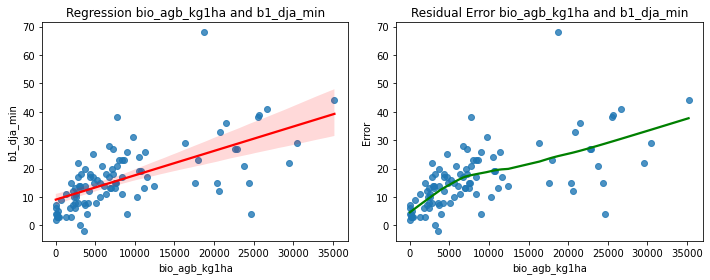

b1_dja_max
slope:  0.0010726817875640476
intersept:  17.036731058530897
r2:  0.6900591249927548
P_value:  2.7804425031355748e-15
std error:  0.00011423235053795106


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


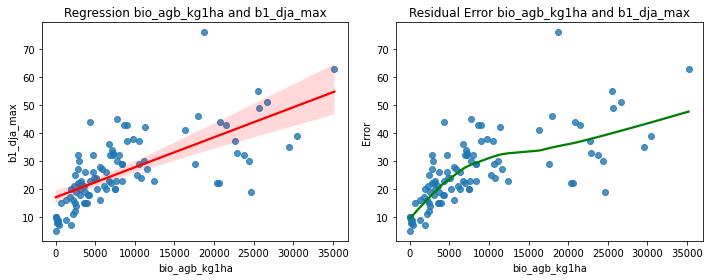

b1_dja_mean
slope:  0.0009665150077290872
intersept:  13.249223594830454
r2:  0.6811903443973858
P_value:  8.569023631808239e-15
std error:  0.00010546987421965443


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


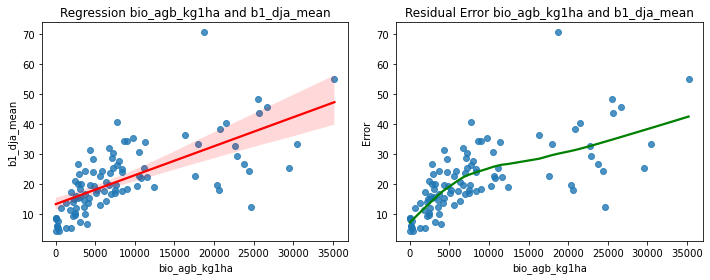

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b1_dja_med
slope:  0.0009709112125686762
intersept:  13.242754103350077
r2:  0.6775529403343599
P_value:  1.3442990430294599e-14
std error:  0.00010700836856865174


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


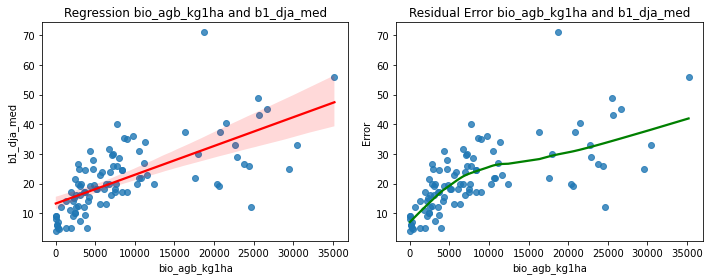

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b1_dja_std
slope:  5.070039760870085e-05
intersept:  2.2163218321565017
r2:  0.25335490361476914
P_value:  0.01139779084889349
std error:  1.9655781899952995e-05


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


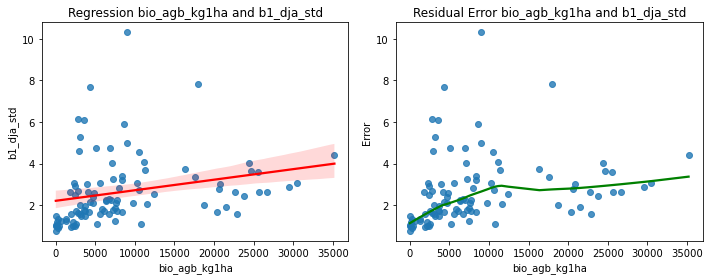

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b1_dja_p25
slope:  0.0009221562597483053
intersept:  11.946290448207225
r2:  0.6712988906912569
P_value:  2.872797830192366e-14
std error:  0.00010337853403645563


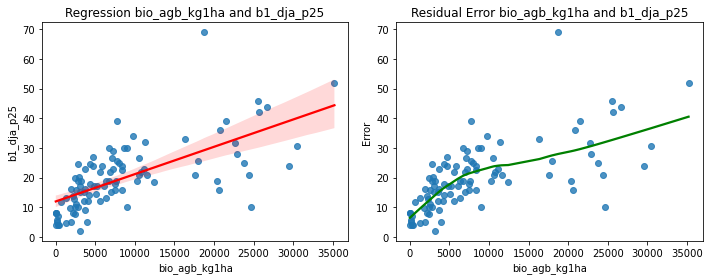

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b1_dja_p50
slope:  0.0009709112125686762
intersept:  13.242754103350077
r2:  0.6775529403343599
P_value:  1.3442990430294599e-14
std error:  0.00010700836856865174


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


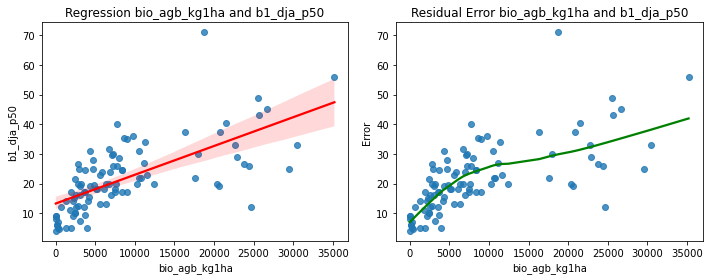

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b1_dja_p75
slope:  0.0010105728482721833
intersept:  14.68239887825071
r2:  0.6809926952879868
P_value:  8.782740669628335e-15
std error:  0.00011033734563161188


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


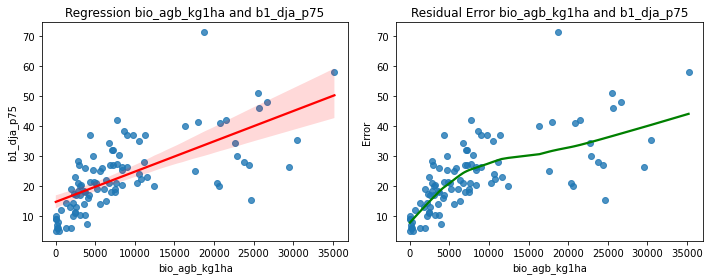

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b1_dja_p95
slope:  0.0010306235966695662
intersept:  16.45741696750534
r2:  0.6766026196246645
P_value:  1.5105363510376692e-14
std error:  0.00011388430049640128


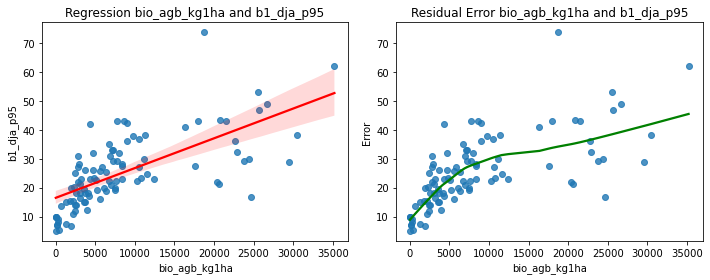

b1_dja_p99


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


slope:  0.0010646875145839648
intersept:  16.9165019364271
r2:  0.687928166584964
P_value:  3.657212375432936e-15
std error:  0.00011405057229111658


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


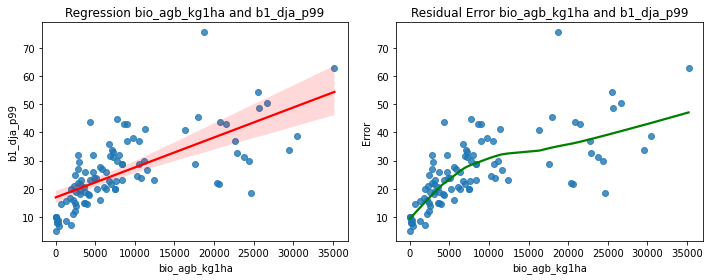

b1_dbi_min
slope: 

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


 -0.01010110803764244
intersept:  454.8133875544529
r2:  -0.537610431945121
P_value:  9.58738168724136e-09
std error:  0.0016085798859015496


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


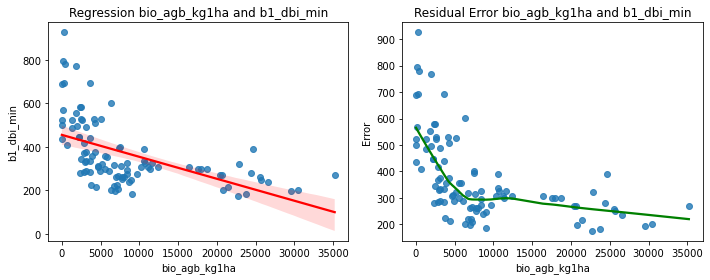

b1_dbi_max
slope:  -0.011726907455057457
intersept:  600.775057442569
r2:  -0.5446474920217884
P_value:  5.617674097625416e-09
std error:  0.001833456796991413


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


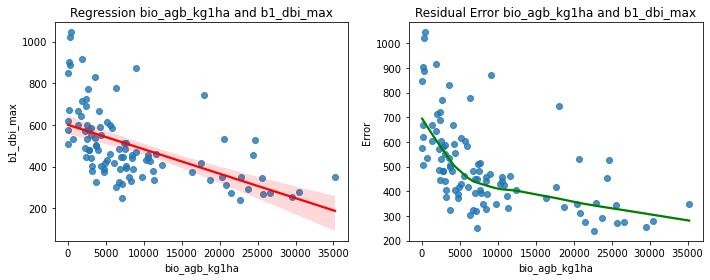

b1_dbi_mean
slope:  -0.010920902574004967
intersept:  522.133685774844
r2:  -0.5612238894973383
P_value:  1.5172911343339091e-09
std error:  0.0016352742473882045


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


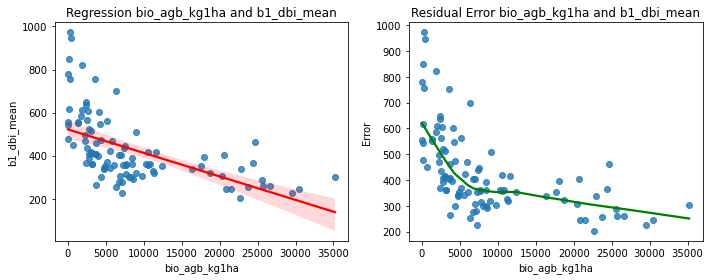

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b1_dbi_med
slope:  -0.010899097981325453
intersept:  520.2933727772746
r2:  -0.5560844101600277
P_value:  2.294358970709588e-09
std error:  0.0016539818686242451


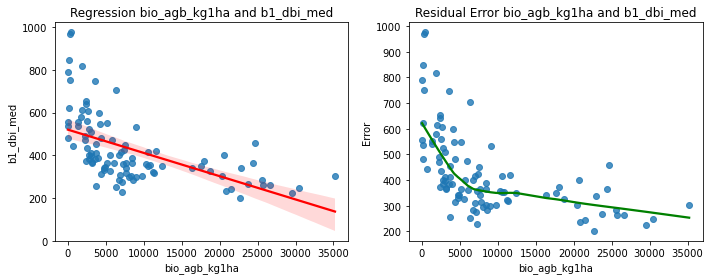

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b1_dbi_std
slope:  -0.0004892049176635063
intersept:  40.427522021751116
r2:  -0.14752607732887746
P_value:  0.14505843147312675
std error:  0.00033301054448531297


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


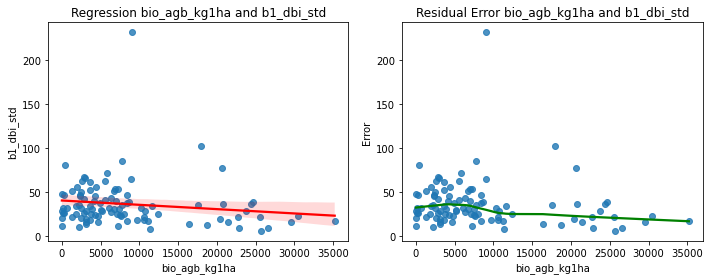

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b1_dbi_p25


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


slope:  -0.010588408457724012
intersept:  494.0410716904456
r2:  -0.5498539695555815
P_value:  3.752576091334557e-09
std error:  0.0016331254877745968


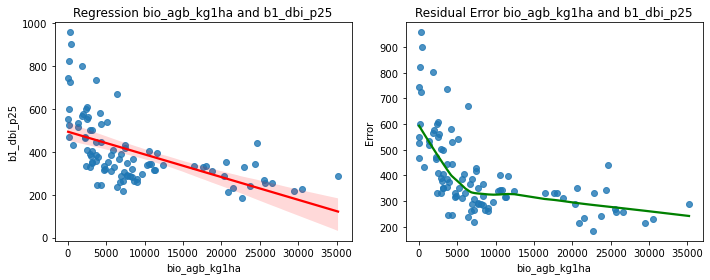

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b1_dbi_p50
slope:  -0.010899097981325453
intersept:  520.2933727772746
r2:  -0.5560844101600277
P_value:  2.294358970709588e-09
std error:  0.0016539818686242451


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


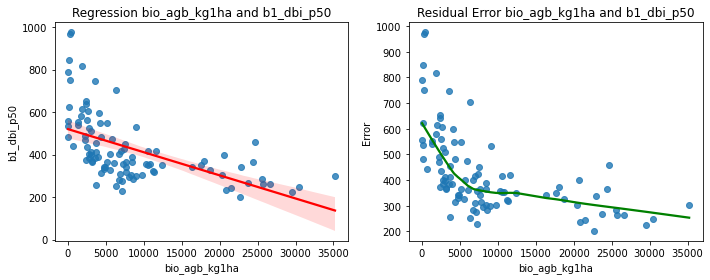

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b1_dbi_p75
slope:  -0.011261165760339371
intersept:  548.7134942168334
r2:  -0.5566944065429881
P_value:  2.185270252847868e-09
std error: 

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


 0.0017062156233534208


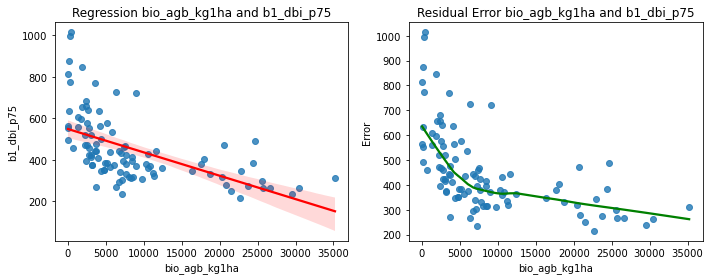

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b1_dbi_p95
slope:  -0.011634849703814273
intersept:  584.0008304191674
r2:  -0.5574204427238805
P_value:  2.0619054621076876e-09
std error:  0.0017595055011267876


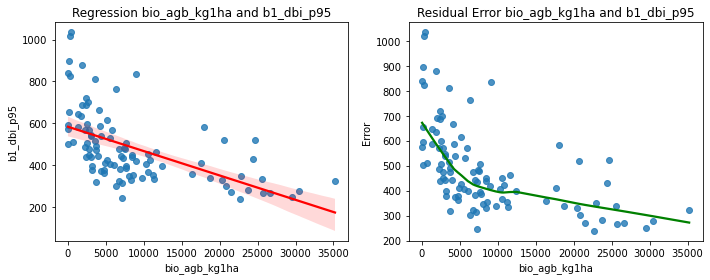

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b1_dbi_p99


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


slope:  -0.011709557166013105
intersept:  597.382391072615
r2:  -0.5479147589904649
P_value:  4.364602091384115e-09
std error:  0.0018152033739703376


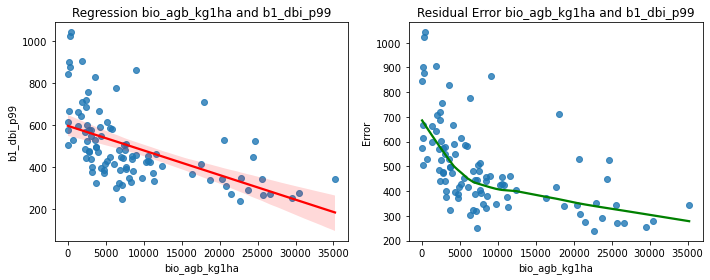

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b2_dbi_min
slope:  -0.016390107549624583
intersept:  735.4399935916367
r2:  -0.5844802482672495
P_value:  2.131998304872964e-10
std error:  0.0023102838817579264


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


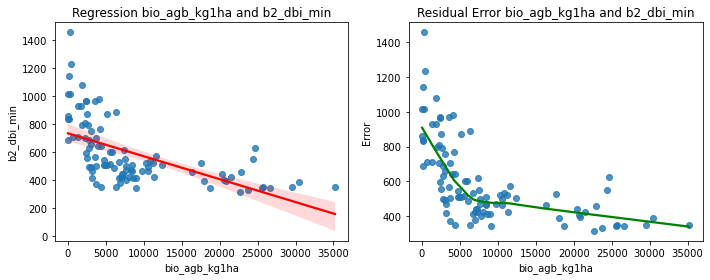

b2_dbi_max
slope:  -0.01886275989430471
intersept:  943.661863633259
r2:  -0.5603963755388613
P_value:  1.6225277646982094e-09
std error:  0.002830558600250695


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


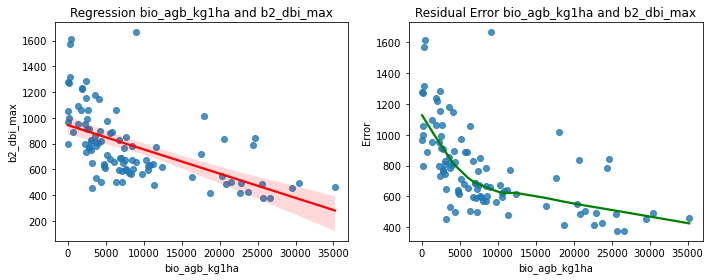

b2_dbi_mean


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


slope:  -0.017878735568467388
intersept:  834.4090095094068
r2:  -0.604890693547939
P_value:  3.3369369684104514e-11
std error:  0.0023897660667582185


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


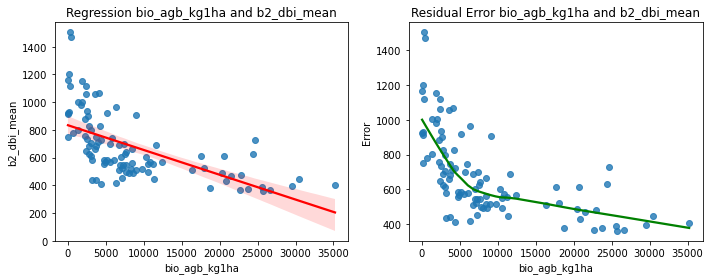

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b2_dbi_med
slope:  -0.017986864668736526
intersept:  832.4873983628083
r2:  -0.6067577758866113
P_value:  2.7976777520969934e-11
std error:  0.00239254175708555


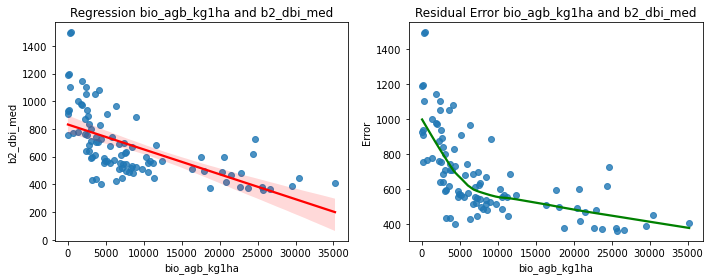

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b2_dbi_std
slope:  -0.00072024225289261
intersept:  58.04656179988759
r2:  -0.12360300850426059
P_value:  0.22288386298563564
std error:  0.0005871114802201899


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


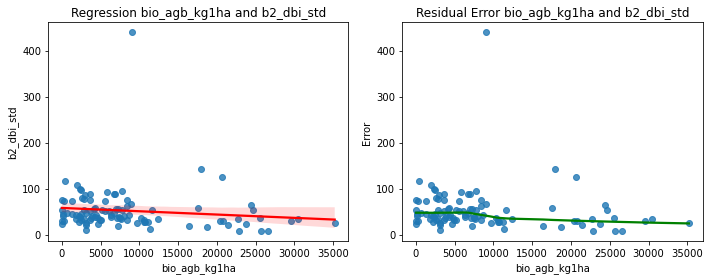

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b2_dbi_p25
slope:  -0.017422207436361196
intersept:  793.1986980040531
r2:  -0.6020043130825645
P_value:  4.372364420148407e-11
std error:  0.002346328056330354


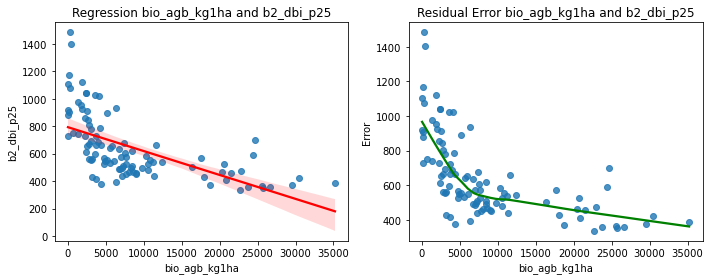

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b2_dbi_p50


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


slope:  -0.017986864668736526
intersept:  832.4873983628083
r2:  -0.6067577758866113
P_value:  2.7976777520969934e-11
std error:  0.00239254175708555


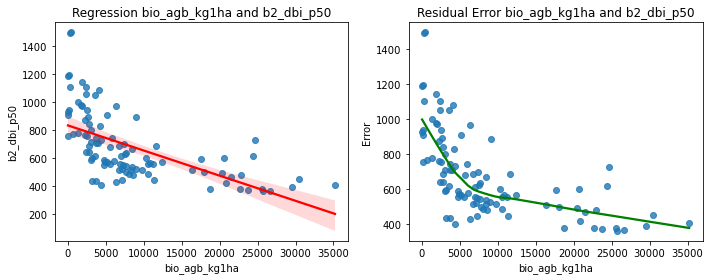

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b2_dbi_p75
slope:  -0.018428983023142144
intersept:  874.0849358915234
r2:  -0.5857969450521643
P_value:  1.8989235391593594e-10
std error:  0.002588802012969608


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


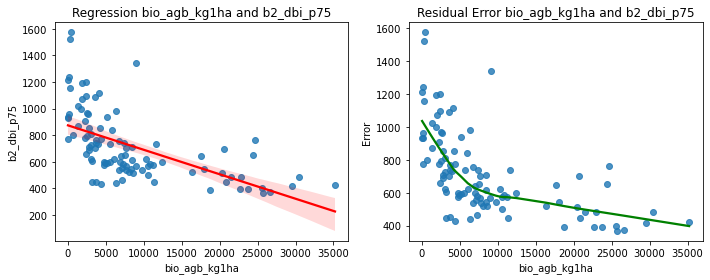

b2_dbi_p95


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


slope:  -0.01886875944974976
intersept:  923.877153913618
r2:  -0.5766391005524542
P_value:  4.203499336677186e-10
std error:  0.00271440665991858


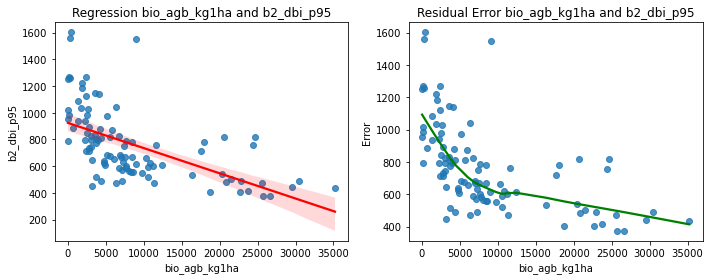

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b2_dbi_p99
slope:  -0.018865167772192302
intersept:  939.7131999390446
r2:  -0.5640534511027705
P_value:  1.2047027648569337e-09
std error:  0.0028041223658111965


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


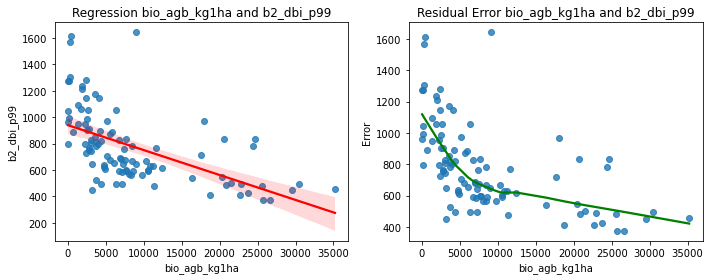

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b3_dbi_min
slope:  -0.028650808167960305
intersept:  1076.0689043684358
r2:  -0.6362266190402485
P_value:  1.476720537686966e-12
std error:  0.0035275758379097006


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


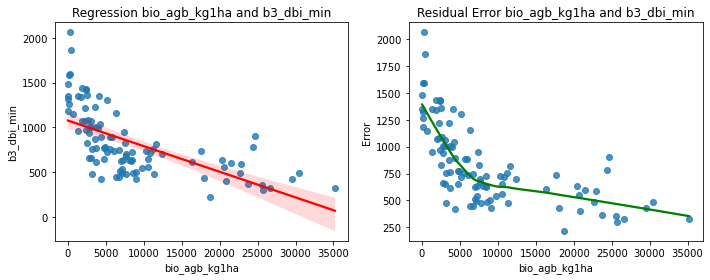

b3_dbi_max
slope: 

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


 -0.03196144607670772
intersept:  1415.4450733363515
r2:  -0.5902334086688319
P_value:  1.2806454767638855e-10
std error:  0.004438287952271707


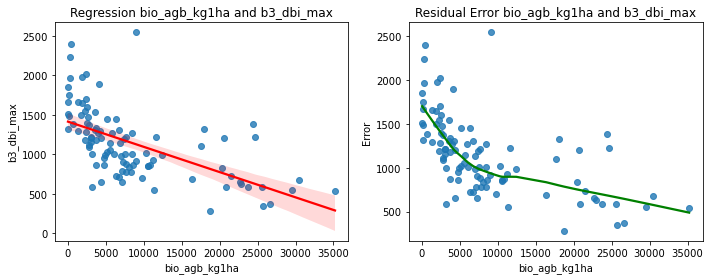

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b3_dbi_mean
slope: 

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


 -0.031133092257174907
intersept:  1240.6455660639372
r2:  -0.6501980712791646
P_value:  3.2693791552870866e-13
std error:  0.0036937700197069386


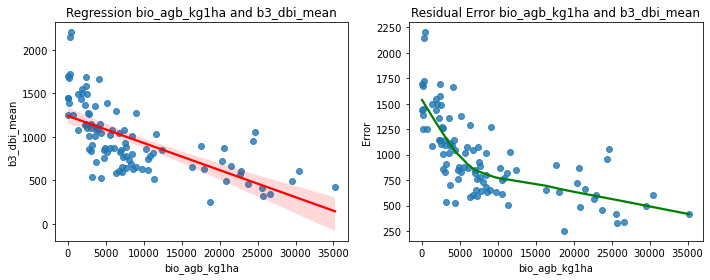

b3_dbi_med


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


slope:  -0.03159528237126922
intersept:  1238.5405373612305
r2:  -0.6541687296103509
P_value:  2.09942337753037e-13
std error:  0.003709100722880819


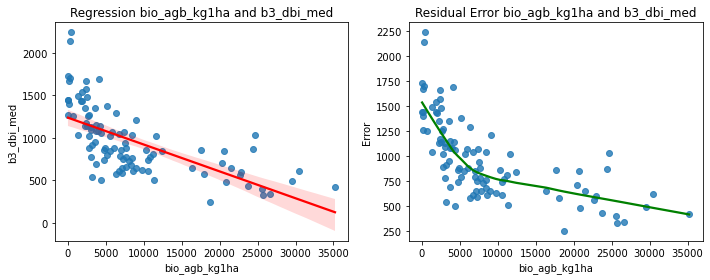

b3_dbi_std
slope:  -0.0008724014082846655
intersept:  93.8271419076555
r2:  -0.09191916706790505
P_value:  0.36552558918824474
std error:  0.000959581595601541


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


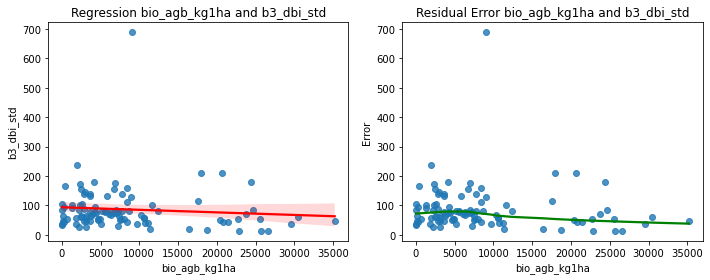

b3_dbi_p25
slope:  -0.030774880328122065
intersept:  1176.669984118977
r2:  -0.6523827586942268
P_value:  2.564351340504418e-13
std error:  0.00363006174791277


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


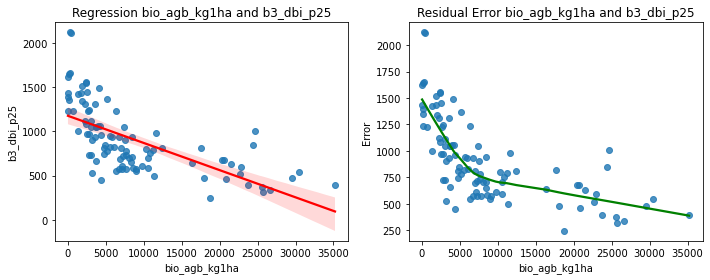

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b3_dbi_p50
slope:  -0.03159528237126922
intersept:  1238.5405373612305
r2:  -0.6541687296103509
P_value:  2.09942337753037e-13
std error:  0.003709100722880819


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


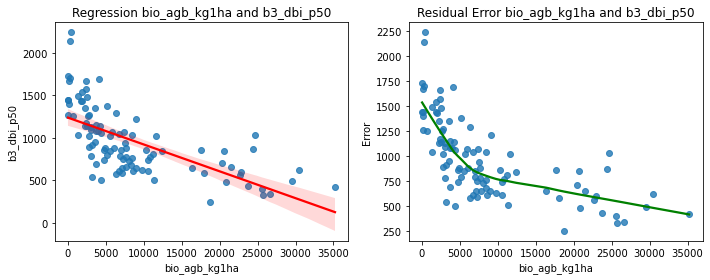

b3_dbi_p75


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


slope:  -0.0319098878159215
intersept:  1305.1747082571105
r2:  -0.630828972113669
P_value:  2.590986343008576e-12
std error:  0.003985160286205344


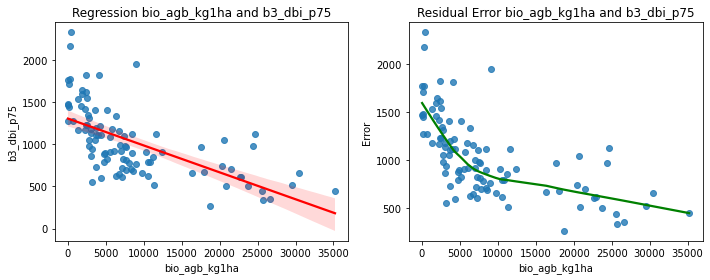

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b3_dbi_p95
slope:  -0.03198969693482454
intersept:  1381.0157223884628
r2:  -0.6034769788484546
P_value:  3.8104873223859816e-11
std error:  0.004291697654979532


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


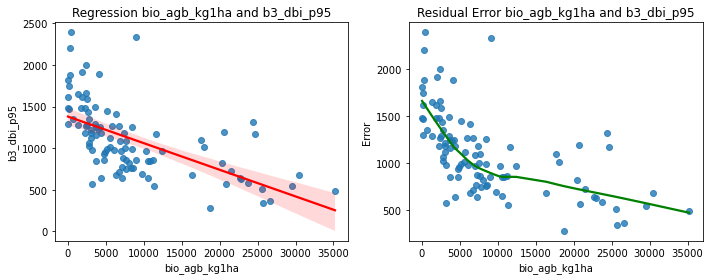

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b3_dbi_p99
slope:  -0.03197450789630518
intersept:  1408.5076432521976
r2:  -0.5935128637057547
P_value:  9.534340482340136e-11
std error:  0.0044023955002343105


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


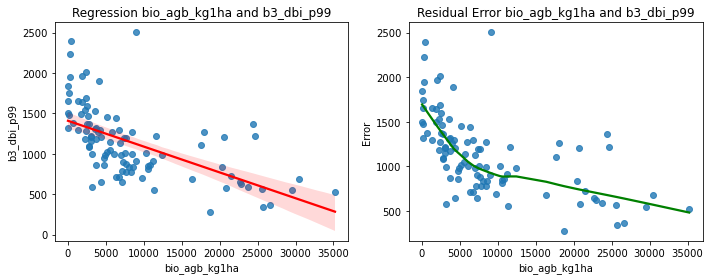

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b4_dbi_min
slope:  -0.01809160885663456
intersept:  2188.501601056892
r2:  -0.4147468410159206
P_value:  1.9710279945222964e-05
std error:  0.004030133990124521


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


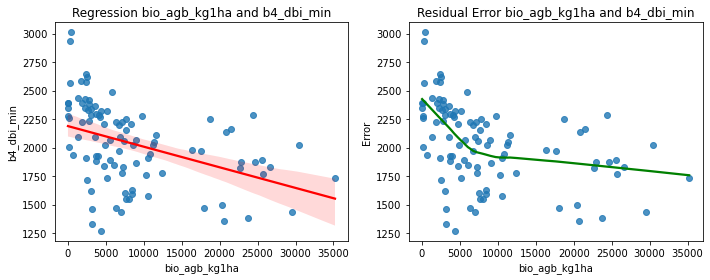

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b4_dbi_max
slope:  -0.015495482413351096
intersept:  2569.2068576415613
r2:  -0.33923316857141095
P_value:  0.0005927566966885369
std error:  0.004362878726146533


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


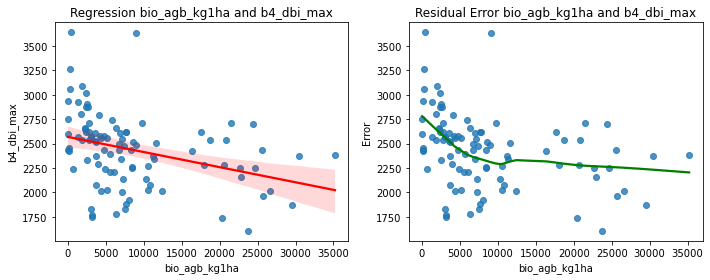

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b4_dbi_mean
slope:  -0.017323696000383148
intersept:  2375.2096272288686
r2:  -0.4062470114265476
P_value:  3.0170557943146e-05
std error:  0.003956382009417142


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


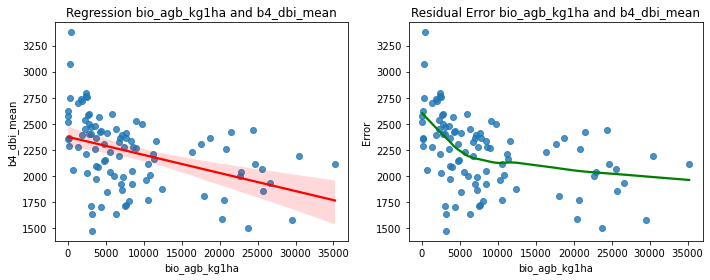

b4_dbi_med
slope: 

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


 -0.017492528790523695
intersept:  2371.232562114425
r2:  -0.40725307541368866
P_value:  2.8705129638758994e-05
std error:  0.003983117476727052


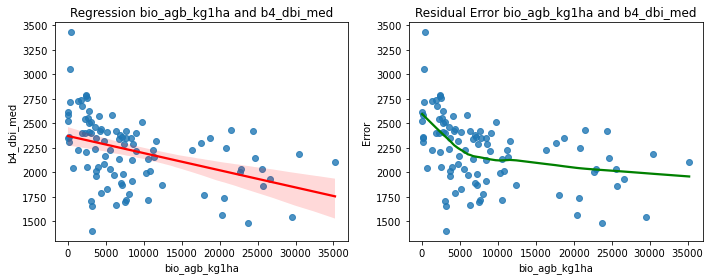

b4_dbi_std


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


slope:  0.0006431196184586785
intersept:  106.13678711306903
r2:  0.07956952704908511
P_value:  0.4336891364451416
std error:  0.0008180501282938697


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


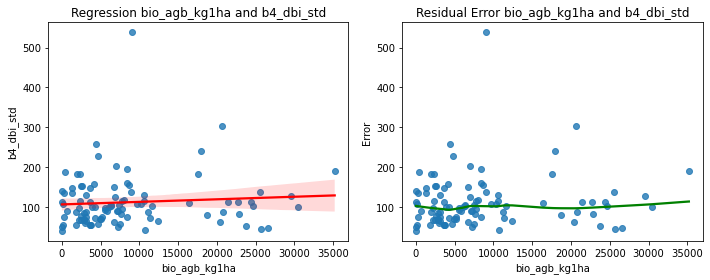

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b4_dbi_p25
slope:  -0.017742763707455995
intersept:  2300.989662935892
r2:  -0.4088189963944631
P_value:  2.6556088416222133e-05
std error:  0.004021537924675324


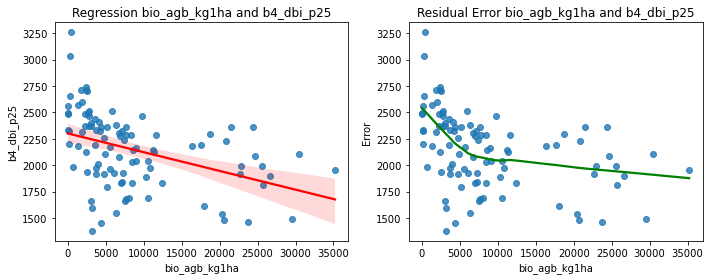

b4_dbi_p50
slope: 

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


 -0.017492528790523695
intersept:  2371.232562114425
r2:  -0.40725307541368866
P_value:  2.8705129638758994e-05
std error:  0.003983117476727052


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


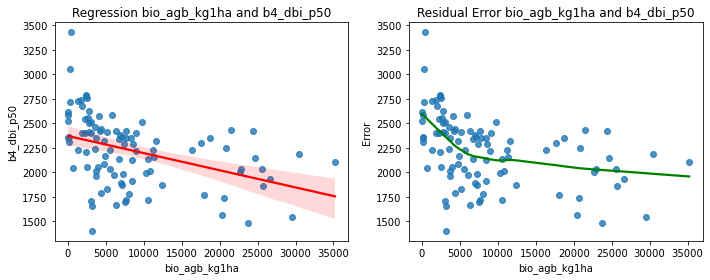

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b4_dbi_p75
slope:  -0.0165398067212938
intersept:  2446.0697806566027
r2:  -0.3833589806396649
P_value:  8.978136287187992e-05
std error:  0.004045969214060865


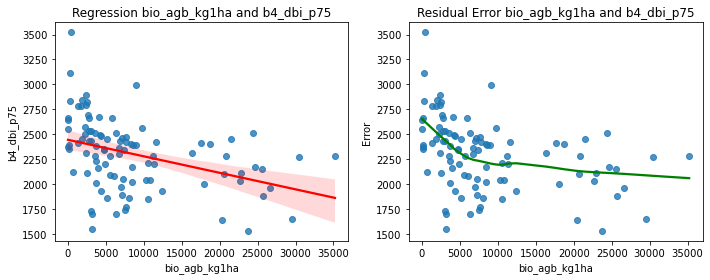

b4_dbi_p95


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


slope:  -0.016001683583905583
intersept:  2533.579517426678
r2:  -0.3603891826677325
P_value:  0.0002480936642089556
std error:  0.004205305483436034


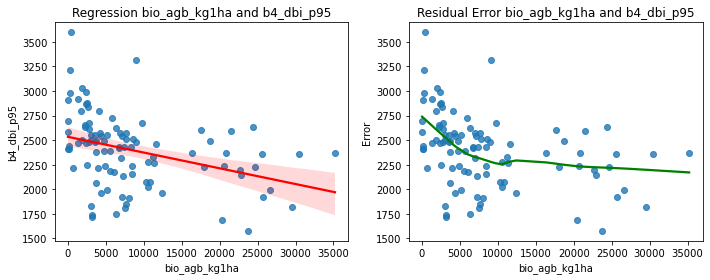

b4_dbi_p99

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning



slope:  -0.015588897365656057
intersept:  2562.0522513644532
r2:  -0.3435068355956872
P_value:  0.000499552124169036
std error:  0.004327421429075772


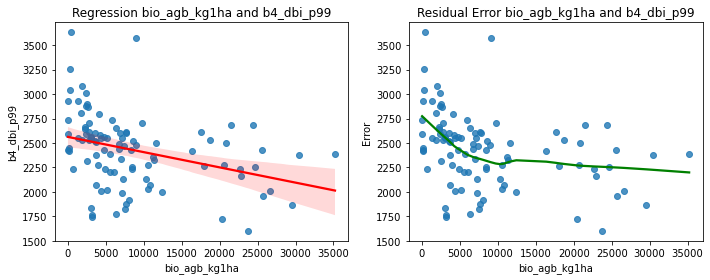

b5_dbi_min
slope: 

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


 -0.04601851747070274
intersept:  2578.95449680817
r2:  -0.6894959077461211
P_value:  2.9900236605135577e-15
std error:  0.004908257055378483


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


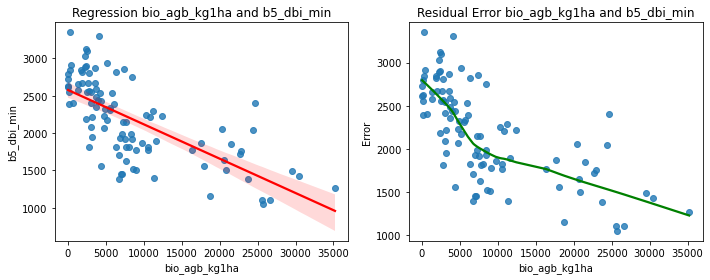

b5_dbi_max
slope:  -0.04621367464564709
intersept:  3126.497086000909
r2:  -0.602394653096389
P_value:  4.216117043215338e-11
std error:  0.00621747973713282


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


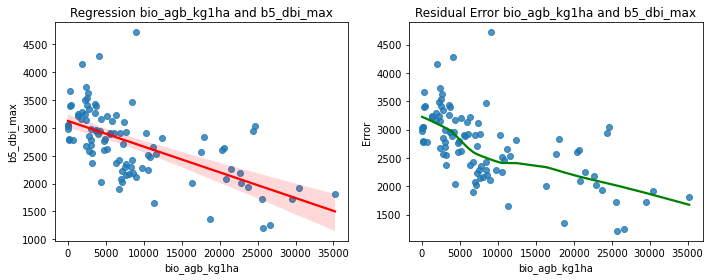

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b5_dbi_mean
slope:  -0.04750071245780378
intersept:  2849.1589713126928
r2:  -0.6881929455024752
P_value:  3.53520700677154e-15
std error:  0.005084614702600982


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


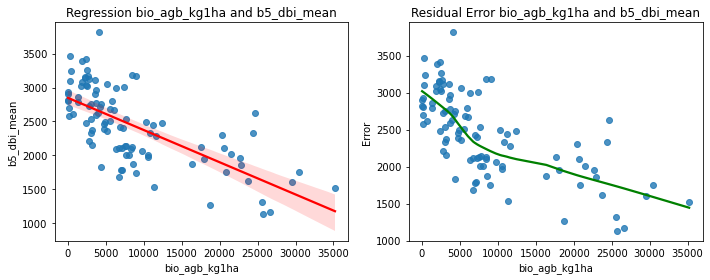

b5_dbi_med
slope:  -0.04770648150017573
intersept:  2842.7744303631052
r2:  -0.6917132281371011
P_value:  2.2439270725829135e-15
std error:  0.005057154905246103


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


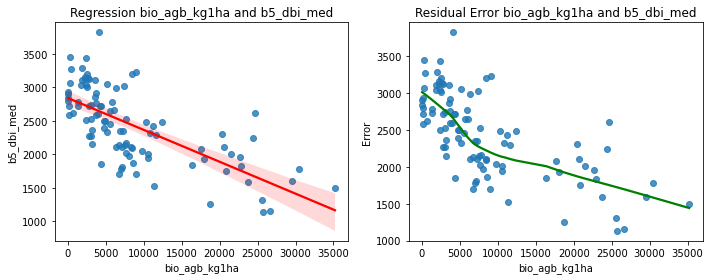

b5_dbi_std
slope:  -1.8473527183308957e-05
intersept:  150.93951158839673
r2:  -0.0014233783218937062
P_value:  0.988843883298385


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


std error:  0.0013177807820045166


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


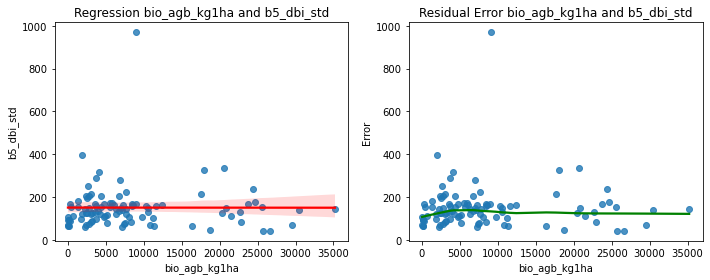

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b5_dbi_p25
slope:  -0.04792402372447023
intersept:  2747.4169529206747
r2:  -0.7088328026553465
P_value:  2.2360741103291137e-16
std error:  0.004842221027268562


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


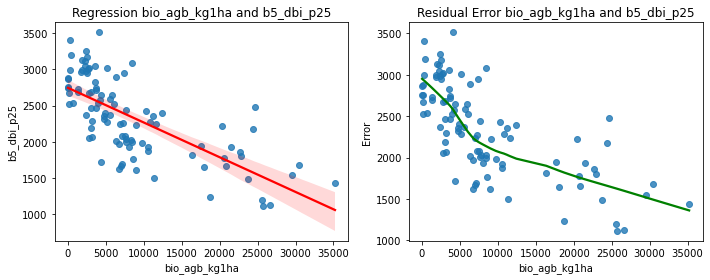

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b5_dbi_p50
slope:  -0.04770648150017573
intersept:  2842.7744303631052
r2:  -0.6917132281371011
P_value:  2.2439270725829135e-15
std error:  0.005057154905246103


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


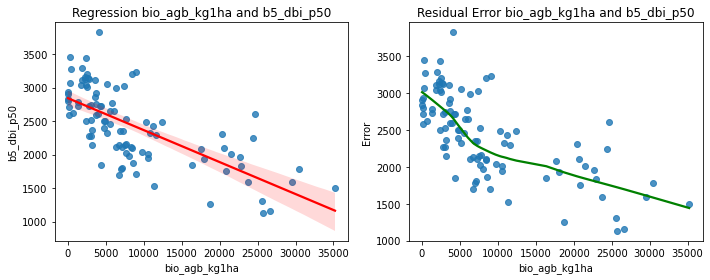

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b5_dbi_p75
slope:  -0.04731353973331963
intersept:  2947.6491753171254
r2:  -0.6497151459426544
P_value:  3.4487977408766387e-13
std error:  0.005620717306879646


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


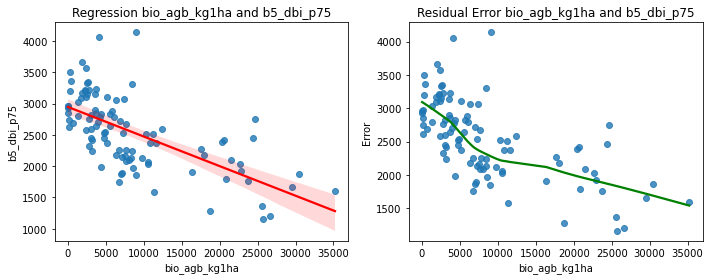

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b5_dbi_p95
slope:  -0.0467409285523925
intersept:  3076.5239771570064
r2:  -0.6190545761916825
P_value:  8.510058881816567e-12
std error:  0.006020667661944753


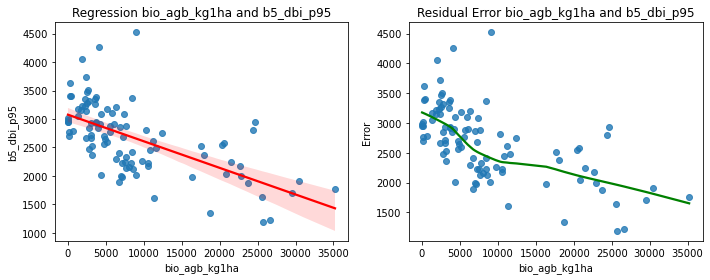

b5_dbi_p99
slope:  -0.04629059868309185
intersept:  3116.259665151744
r2:  -0.605834211585983
P_value:  3.0529941879458855e-11
std error:  0.006172242102521786


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


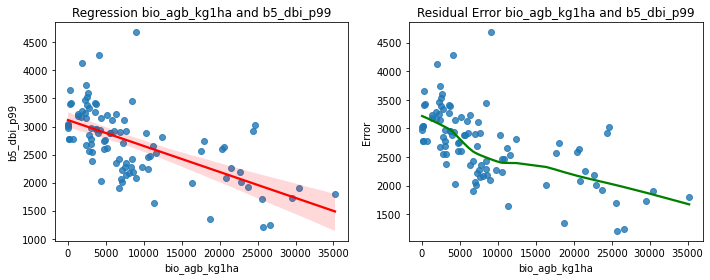

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b6_dbi_min
slope:  -0.0368856049402603
intersept:  1602.5671217517552
r2:  -0.676140869317001
P_value:  1.5983298662515543e-14
std error:  0.004081005559350717


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


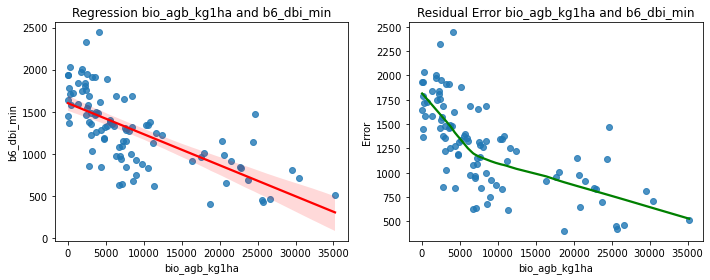

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b6_dbi_max
slope:  -0.04069189058757177
intersept:  2131.987088936097
r2:  -0.5565598374481051
P_value:  2.2088997954899396e-09
std error:  0.006167519909447259


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


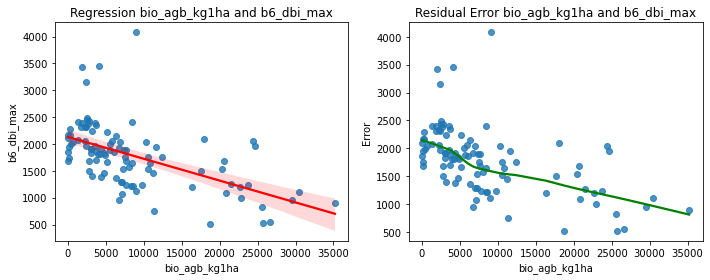

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b6_dbi_mean
slope:  -0.039925570332996575
intersept:  1860.4712684999952
r2:  -0.6601588268128871
P_value:  1.0627265582898643e-13
std error:  0.004612428464894788


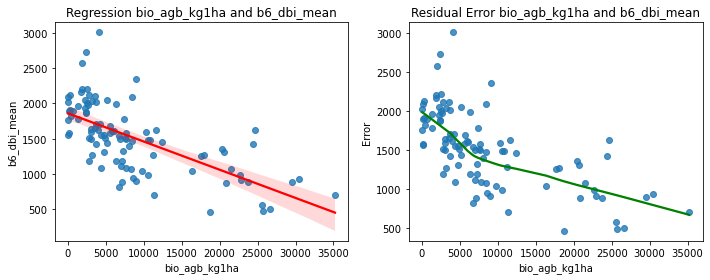

b6_dbi_med


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


slope:  -0.04025540565946945
intersept:  1855.3668717898704
r2:  -0.6663976274572633
P_value:  5.143359792876362e-14
std error:  0.004573079830208302


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


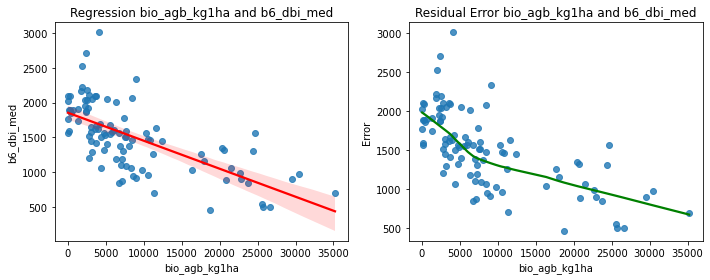

b6_dbi_std


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


slope:  -0.0008453606620338186
intersept:  142.06030415993956
r2:  -0.059474319510914996
P_value:  0.5587060785582623
std error:  0.001440645848326261


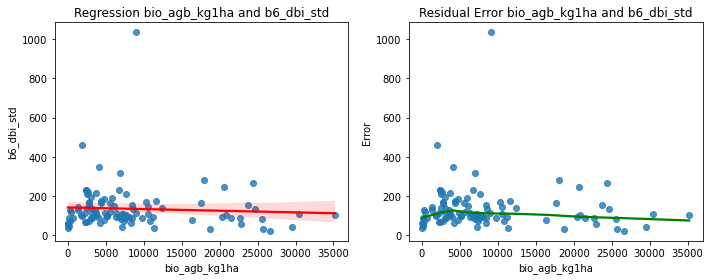

b6_dbi_p25
slope:  -0.03959302827044735
intersept:  1763.9344577736463
r2:  -0.6900286961173637
P_value:  2.7913922848538597e-15
std error:  0.004216707586765005


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


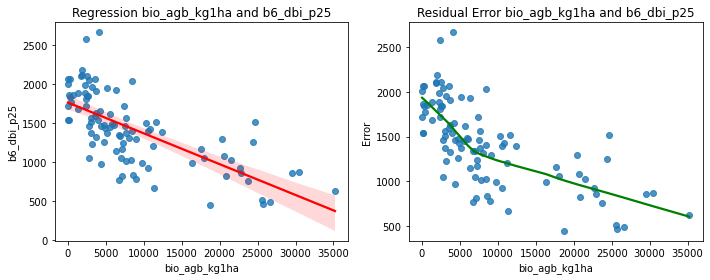

b6_dbi_p50
slope:  -0.04025540565946945
intersept:  1855.3668717898704
r2:  -0.6663976274572633
P_value:  5.143359792876362e-14
std error:  0.004573079830208302


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


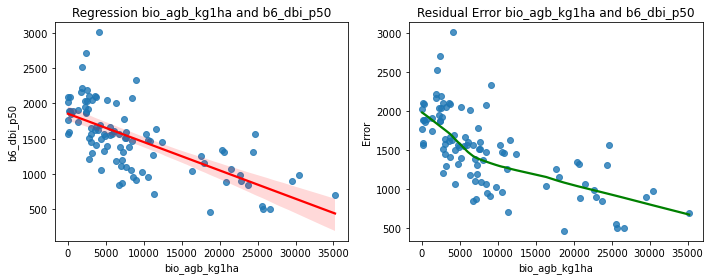

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b6_dbi_p75
slope:  -0.0407074700228014
intersept:  1956.564354963007
r2:  -0.6113035544275206
P_value:  1.812685296703387e-11
std error:  0.005350880976785436


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


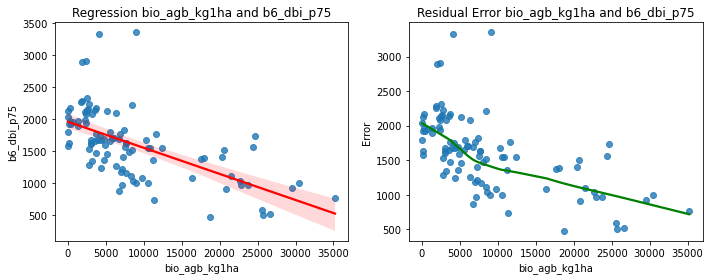

b6_dbi_p95
slope:  -0.04051608693547832
intersept:  2069.851416285531
r2:  -0.5727913509022765
P_value:  5.82719757933985e-10
std error:  0.005887091014972514


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


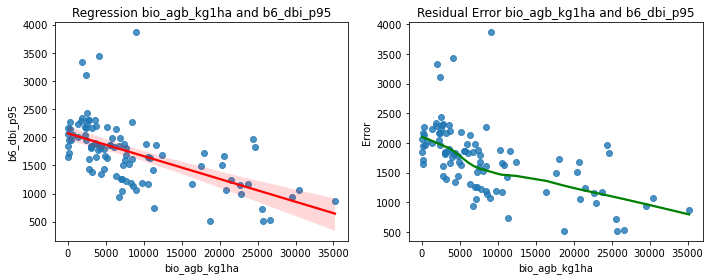

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b6_dbi_p99


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


slope:  -0.040667181630416646
intersept:  2119.5726967637706
r2:  -0.5603387468794807
P_value:  1.6301115501101262e-09
std error:  0.006103459920142913


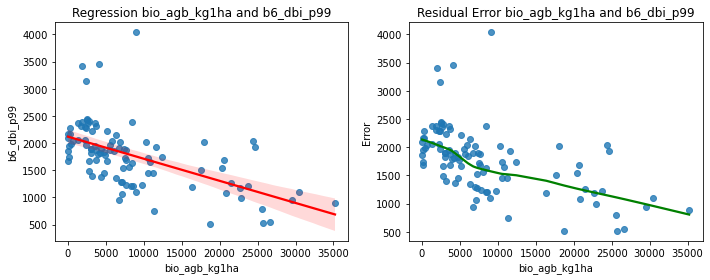

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b1_dim_min
slope:  -0.0004868910307812621
intersept:  14.605507042280937
r2:  -0.37850995090406064
P_value:  0.00011197716044170268
std error:  0.00012089007531251301


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


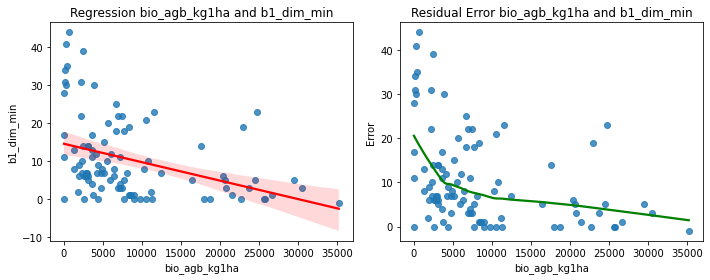

b1_dim_max
slope:  -0.0006767523758680803
intersept:  28.04234088037485
r2:  -0.3661114709466159
P_value:  0.00019395794290941849
std error:  0.0001746546292004174


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


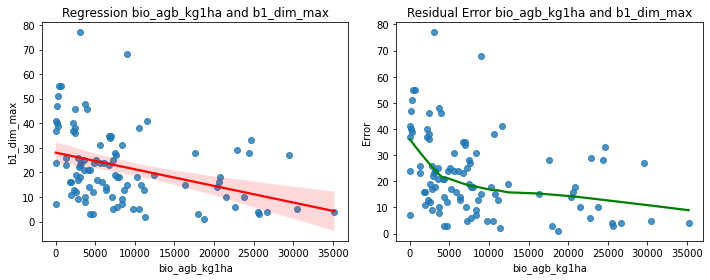

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b1_dim_mean
slope:  -0.0006156295935869983
intersept:  21.28688751326785
r2:  -0.4220052493114728
P_value:  1.3576880511843406e-05
std error:  0.00013428525091126127


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


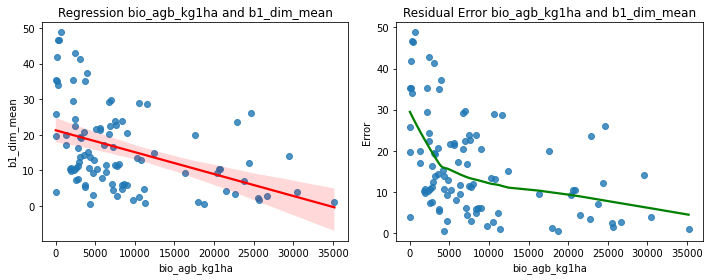

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b1_dim_med
slope:  -0.0006466586942951845
intersept:  21.538304174791755
r2:  -0.43444702160559195
P_value:  7.022199901934409e-06
std error:  0.0001361229439725523


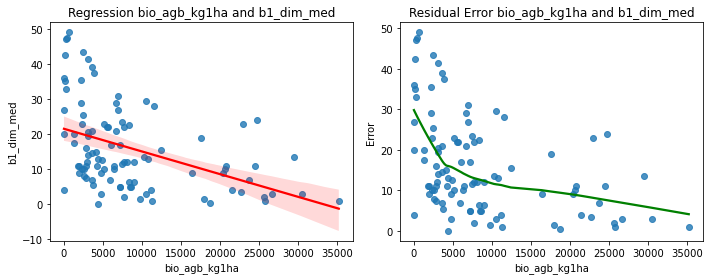

b1_dim_std
slope: 

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


 -4.8354641868296495e-05
intersept:  3.6954524312413524
r2:  -0.13036734295366018
P_value:  0.19838673732630638
std error:  3.733887346880757e-05


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


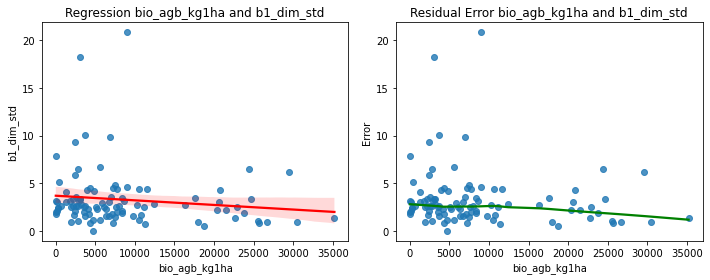

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b1_dim_p25
slope:  -0.0005894144767285401
intersept:  18.810372887691003
r2:  -0.42111019976134173
P_value:  1.4222164154777625e-05
std error:  0.00012889943024509625


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


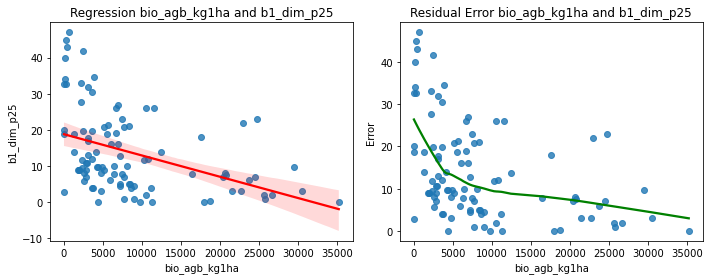

b1_dim_p50


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


slope:  -0.0006466586942951845
intersept:  21.538304174791755
r2:  -0.43444702160559195
P_value:  7.022199901934409e-06
std error:  0.0001361229439725523


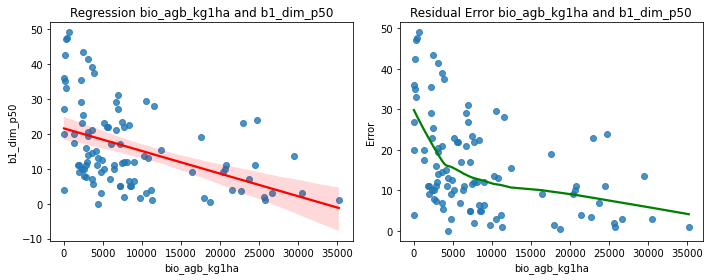

b1_dim_p75
slope:  -0.000655232974058304
intersept:  23.692211786478637
r2:  -0.41869328206688866
P_value:  1.6111425449532177e-05
std error:  0.00014429816624715884


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


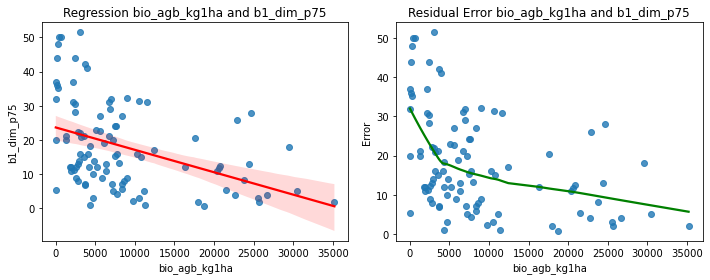

b1_dim_p95


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


slope:  -0.0006602797079729612
intersept:  26.526146518237283
r2:  -0.37437084375063995
P_value:  0.00013484822297601002
std error:  0.00016605445127182292


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


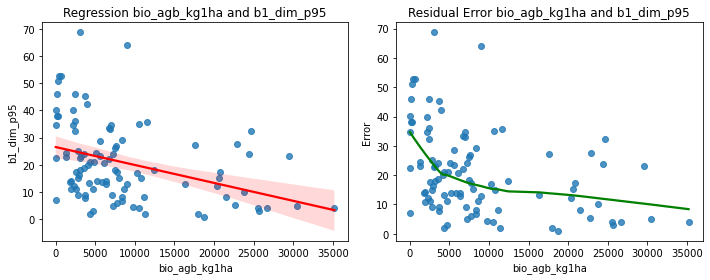

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b1_dim_p99
slope:  -0.0006736809842305294
intersept:  27.73423671501734
r2:  -0.3681244152621701
P_value:  0.00017767385785628348
std error:  0.00017276365501762755


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


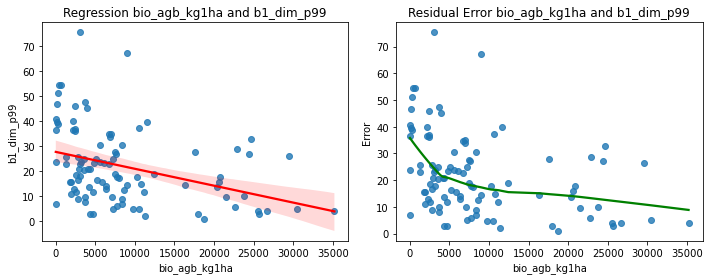

b2_dim_min
slope:  0.00102904878309962
intersept:  15.206701536229536
r2:  0.5270847296419787
P_value:  2.0852506108316346e-08
std error:  0.0001684584878380762


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


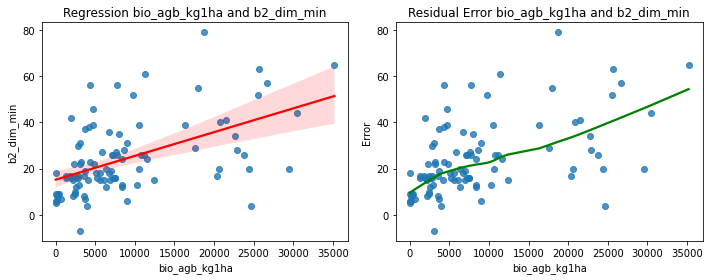

b2_dim_max


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


slope:  0.001113902593429743
intersept:  25.19035594481523
r2:  0.559961055805274
P_value:  1.68066277956891e-09
std error:  0.00016734238695192096


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


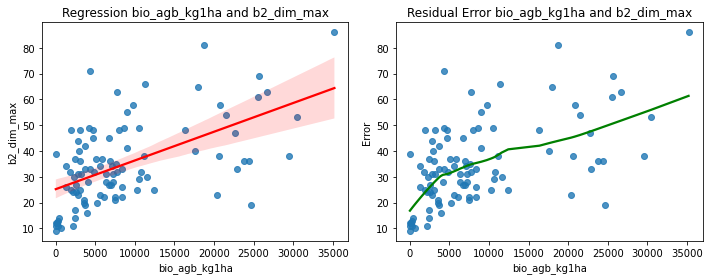

b2_dim_mean


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


slope:  0.0010866533905406943
intersept:  20.233820979890403
r2:  0.5586067151093168
P_value:  1.8745815933661505e-09
std error:  0.0001638249909159679


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


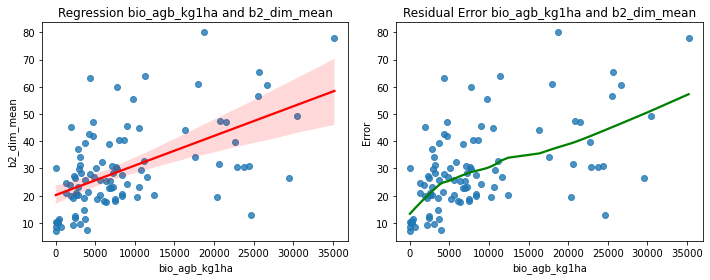

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b2_dim_med
slope:  0.0011111321330372823
intersept:  20.219025851215136
r2:  0.5635321718270914
P_value:  1.257211014665008e-09
std error:  0.0001653829197976257


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


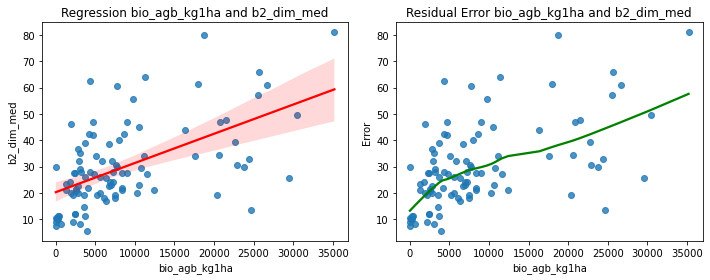

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b2_dim_std
slope:  2.5498934466582343e-05
intersept:  2.741872301686972
r2:  0.1115518526955117
P_value:  0.271652206583591
std error:  2.3064300328189287e-05


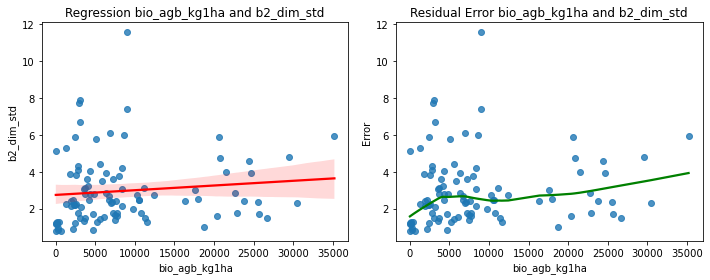

b2_dim_p25


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


slope:  0.0010674176478910793
intersept:  18.44019603830308
r2:  0.5494280856721173
P_value:  3.8794980722150614e-09
std error:  0.00016481829847702799


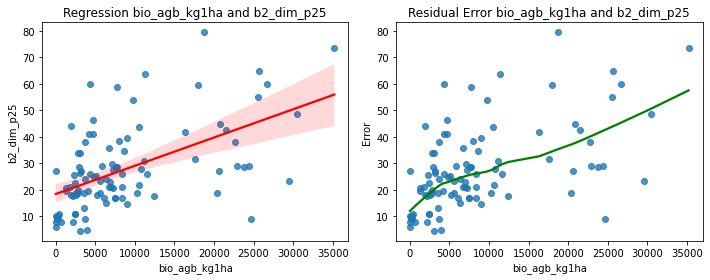

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b2_dim_p50
slope:  0.0011111321330372823
intersept:  20.219025851215136
r2:  0.5635321718270914
P_value:  1.257211014665008e-09
std error:  0.0001653829197976257


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


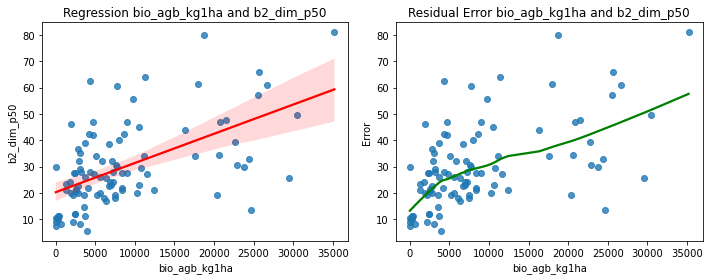

b2_dim_p75


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


slope:  0.0011041489098661467
intersept:  22.0841164758301
r2:  0.559285811964433
P_value:  1.7748088654493566e-09
std error:  0.00016616875206671943


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


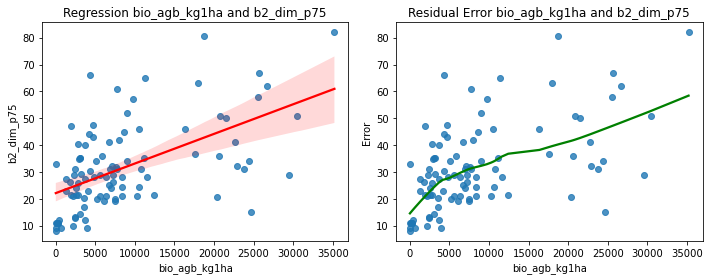

b2_dim_p95
slope:  0.0011133478696962733
intersept:  24.264782179920402
r2:  0.5615588032937591
P_value:  1.4765880585104626e-09
std error:  0.00016656533561279708


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


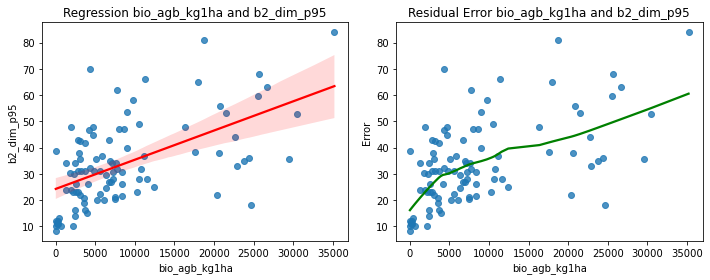

b2_dim_p99
slope:  0.0011135446873285304
intersept:  25.004821394189932
r2:  0.5603506432993395
P_value:  1.628543232242589e-09
std error:  0.00016711915515182888


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


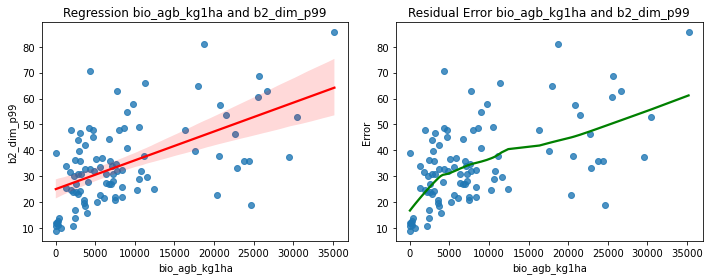

b3_dim_min


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


slope:  -0.00043340214443406263
intersept:  51.44241989916764
r2:  -0.294249614435305
P_value:  0.0031134744424600514
std error:  0.00014293015689508556


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


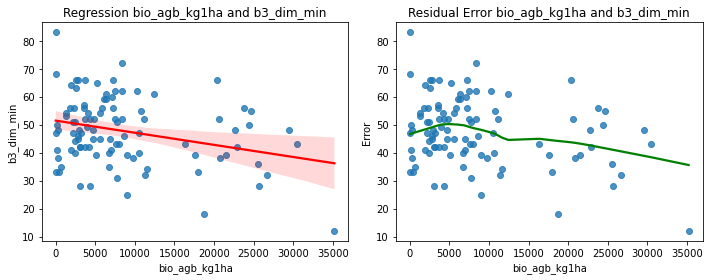

b3_dim_max
slope:  -0.00049532529293839
intersept:  63.05115023481919
r2:  -0.3369429321272866
P_value:  0.0006490209242943643
std error:  0.0001405336015298082


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


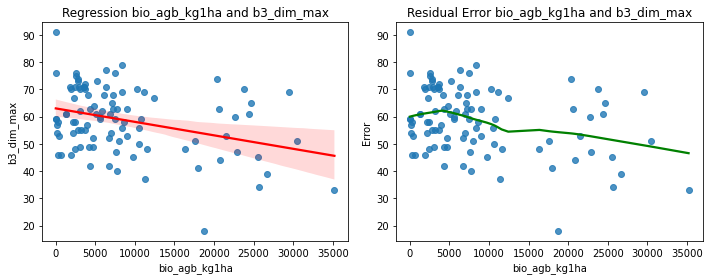

b3_dim_mean
slope:  -0.0004703409700420269
intersept:  57.15026387444484
r2:  -0.3313473294182693
P_value:  0.0008076478683614407
std error:  0.00013598451174109342


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


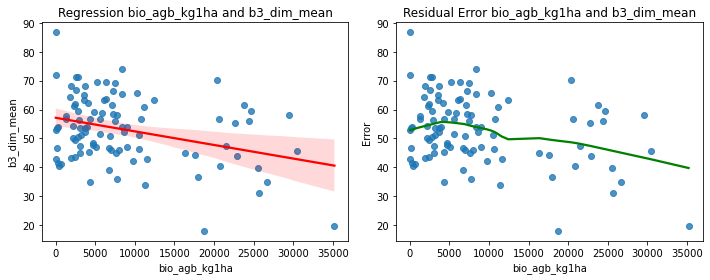

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b3_dim_med
slope:  -0.0004689121772406636
intersept:  56.992633396877544
r2:  -0.32535379713108664
P_value:  0.0010162060832555062
std error:  0.0001383737522807743


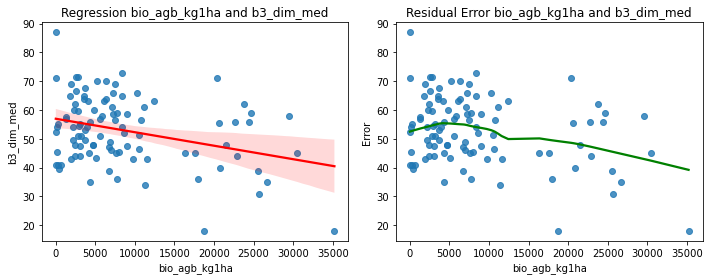

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b3_dim_std
slope:  -1.5448389411666055e-05
intersept:  3.2513981428435934


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


r2:  -0.06481130720604283
P_value:  0.5239001183812699
std error:  2.415085502322481e-05


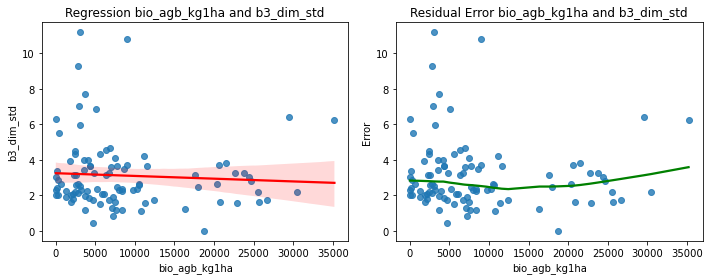

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b3_dim_p25
slope:  -0.00046887452982009024
intersept:  55.00241344605137
r2:  -0.3259079872070187
P_value:  0.0009950427155758354
std error:  0.0001380994835548965


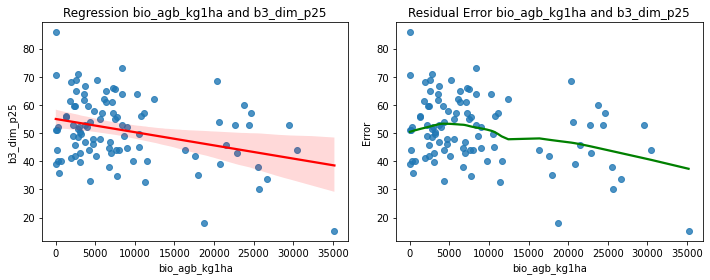

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b3_dim_p50
slope:  -0.0004689121772406636
intersept:  56.992633396877544
r2:  -0.32535379713108664
P_value:  0.0010162060832555062
std error:  0.0001383737522807743


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


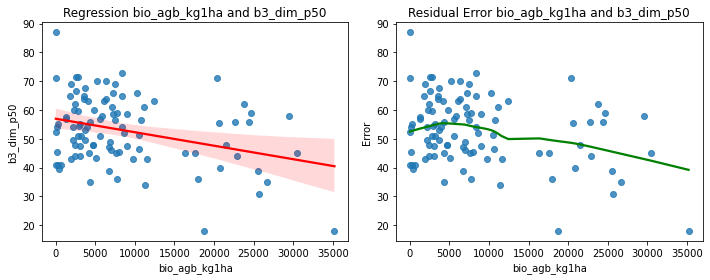

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b3_dim_p75


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


slope:  -0.0004768986391775474
intersept:  59.3006205104553
r2:  -0.33275342428025373
P_value:  0.0007647615757396354
std error:  0.0001372257973828499


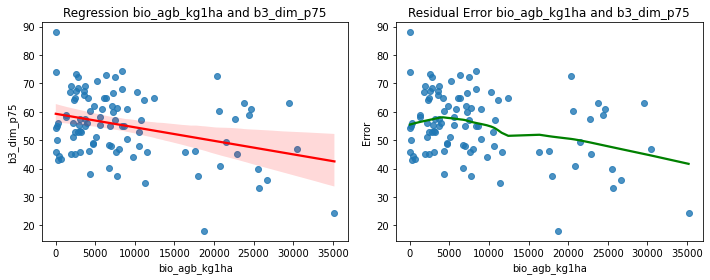

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b3_dim_p95
slope:  -0.0004965383318072349
intersept:  62.08876465547026
r2:  -0.3420386335538255


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


P_value:  0.0005299364317458755
std error:  0.00013850787200355731


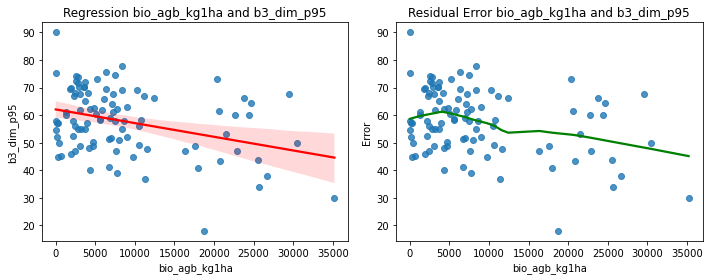

b3_dim_p99


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


slope:  -0.0004954247639652659
intersept:  62.85401847138008
r2:  -0.33807922226625814
P_value:  0.0006205216553950149
std error:  0.0001400287731497764


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


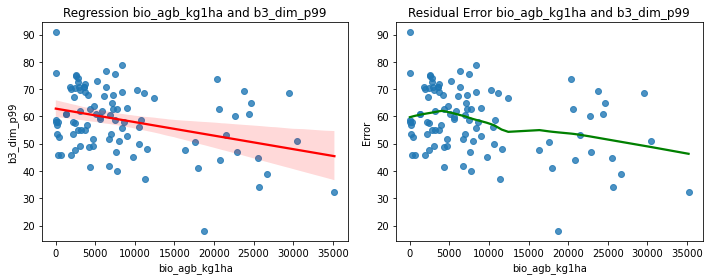

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


dis_min
slope:  -3.495122371485536e-05
intersept:  4.287873645238025
r2:  -0.11105316367357974
P_value:  0.27381434423675405
std error:  3.175783573767533e-05


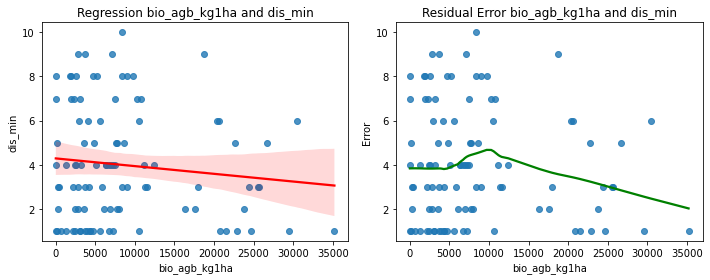

dis_max


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


slope:  6.989514101641218e-05
intersept:  7.434416010032935
r2:  0.2434117914470817
P_value:  0.015191042132060923
std error:  2.827852679842066e-05


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


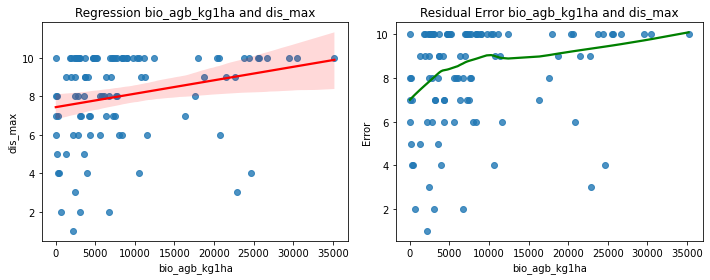

dis_mean


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


slope:  1.3290393942883478e-05
intersept:  5.865745300313598
r2:  0.04596497767988967
P_value:  0.6514301650495105
std error:  2.9326866615697992e-05


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


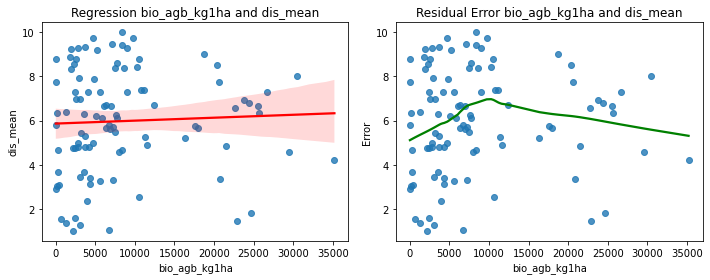

dis_med


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


slope:  1.2309388330278226e-05
intersept:  5.844551964520434
r2:  0.040258991589474706
P_value:  0.6923669163690052
std error:  3.1019548941547704e-05


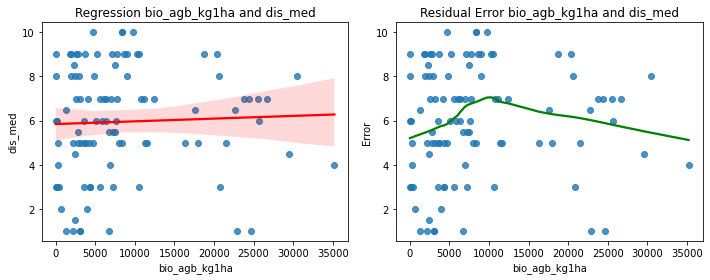

dis_major


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


slope: 

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


 -6.490943595932108e-06
intersept:  5.79271190511866
r2:  -0.019344165074613673
P_value:  0.8492735999197554
std error:  3.406361280238822e-05


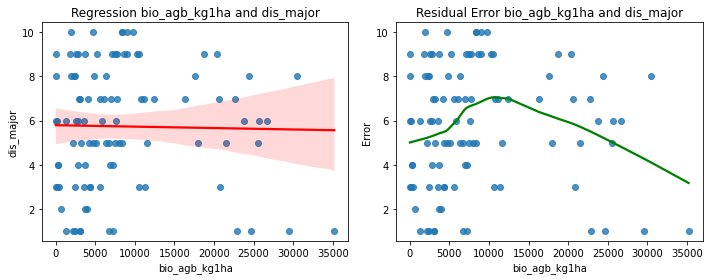

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


dis_minor
slope:  1.1843840116742009e-05
intersept:  5.010137130758691
r2:  0.03207638423405759
P_value:  0.7526221344721357
std error:  3.747121068245771e-05


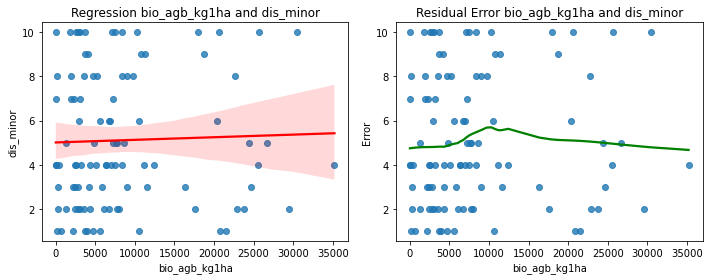

dka_min
slope:  -4.123507866849202e-06
intersept:  1.1765688714870102
r2:  -0.013584038287672736
P_value:  0.8938382473967752
std error:  3.081853501302167e-05


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


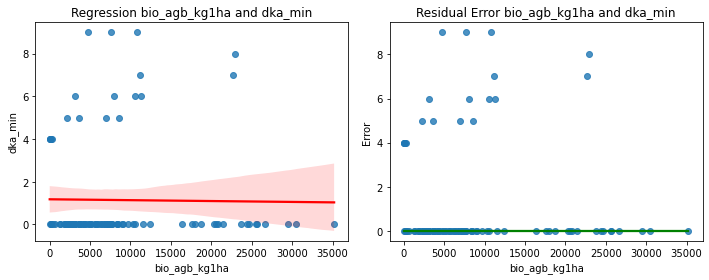

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


dka_max
slope:  3.0154863583327227e-05
intersept:  2.0560477512982986
r2:  0.08008157743916725
P_value:  0.4307267057888755
std error:  3.8110251879677515e-05


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


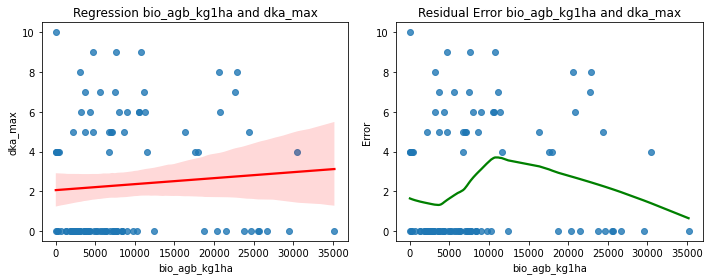

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


dka_mean


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


slope:  2.6663959966851326e-05
intersept:  1.5804557147245348
r2:  0.08187436436891961
P_value:  0.42044619931092675
std error:  3.2955682643040205e-05


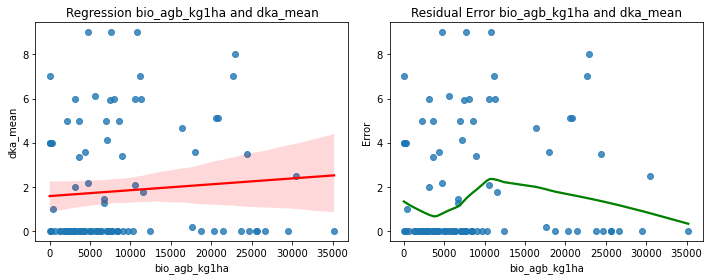

dka_med


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


slope:  4.697287017409696e-05
intersept:  1.4076162946033377
r2:  0.13274529111392527
P_value:  0.19025351887806943
std error:  3.5610787043672354e-05


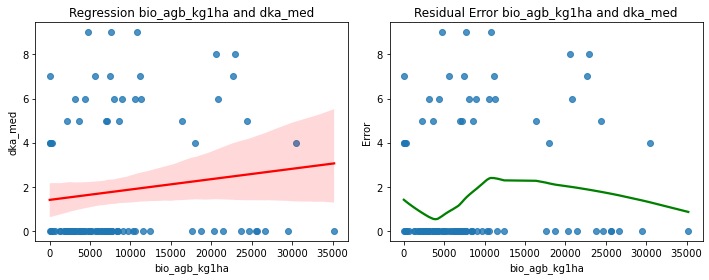

dka_major


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


slope:  5.086660351089542e-05
intersept:  1.3441174638190356
r2:  0.14575072662296787
P_value:  0.15001380643557716
std error:  3.505690112065954e-05


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


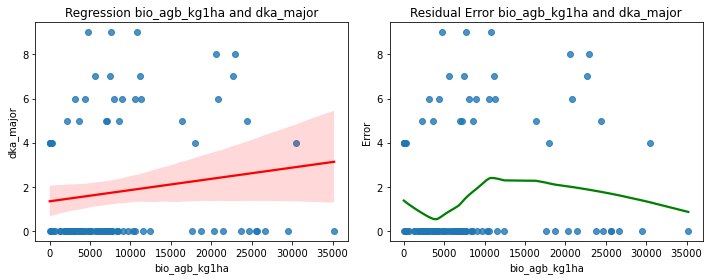

dka_minor


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


slope:  -1.7047781120820462e-05
intersept:  1.7615014973976688
r2:  -0.050797019032050535
P_value:  0.6175486739017308
std error:  3.403162832581327e-05


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


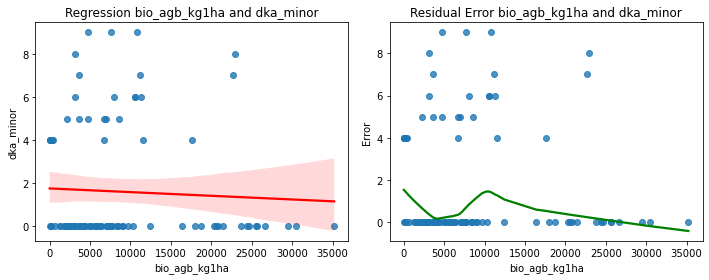

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


stc_min
slope:  0.00024957774719270095
intersept:  2.003552346547555
r2:  0.6211392802487858
P_value:  6.919317467285117e-12
std error:  3.1972820763871586e-05


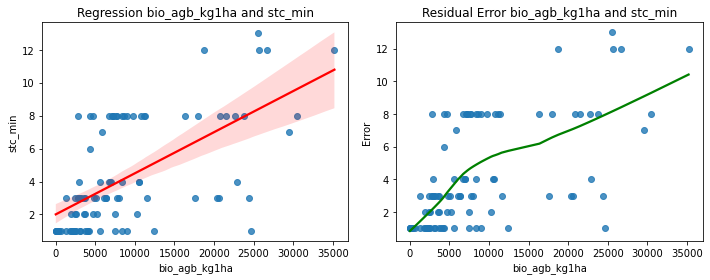

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


stc_max
slope:  0.0002739568282346237
intersept:  4.361366453518997
r2:  0.6845480045948403
P_value:  5.622079535049407e-15
std error:  2.962106633504776e-05


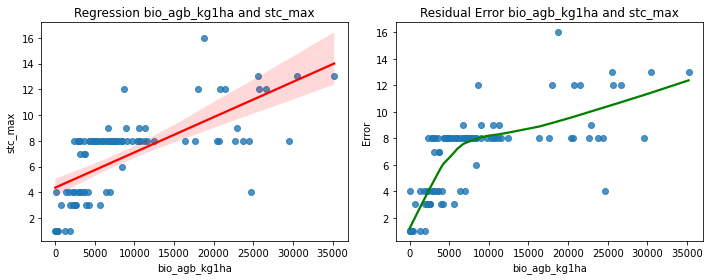

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


stc_mean
slope:  0.000267315444135363
intersept:  3.051396284065031
r2:  0.6908193752998079
P_value:  2.519988257835046e-15
std error:  2.8407199227759108e-05


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


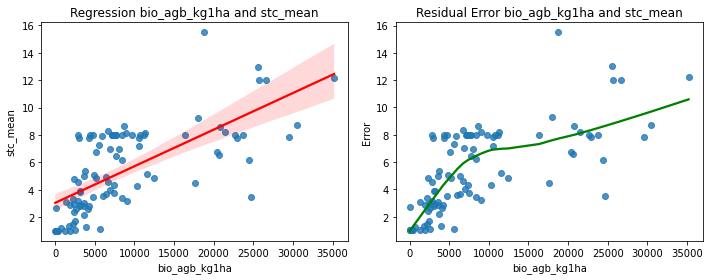

stc_med
slope:  0.00027616477076330075
intersept:  2.9284013518478296
r2:  0.6836476082268341
P_value:  6.2982399518958295e-15
std error:  2.9933759889714066e-05


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


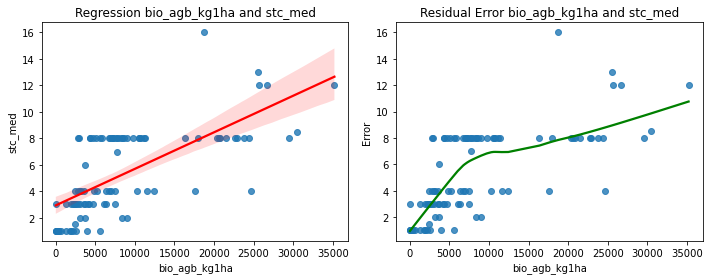

stc_major
slope:  0.0002767174285711005
intersept:  2.8428816185624837
r2:  0.6745035619685621
P_value:  1.9512346315354468e-14
std error:  3.075265079449426e-05


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


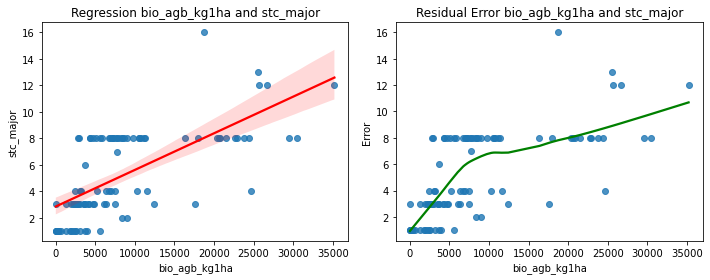

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


stc_minor
slope:  0.0002377719292819506
intersept:  3.3971314636904713
r2:  0.5533762422675342
P_value:  2.8449517202010177e-09
std error:  3.633820281714353e-05


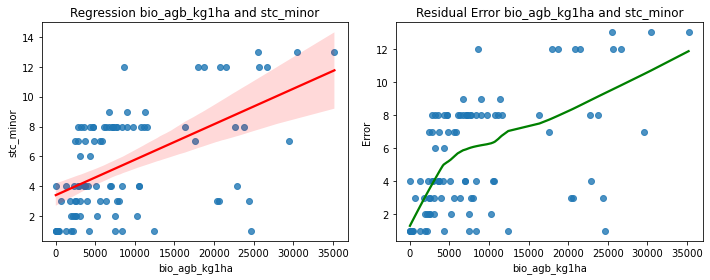

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


h99a2_min
slope:  0.0003248752618406869
intersept:  5.453185171505594
r2:  0.6232689729059673
P_value:  5.591963512721945e-12
std error:  4.138721530341796e-05


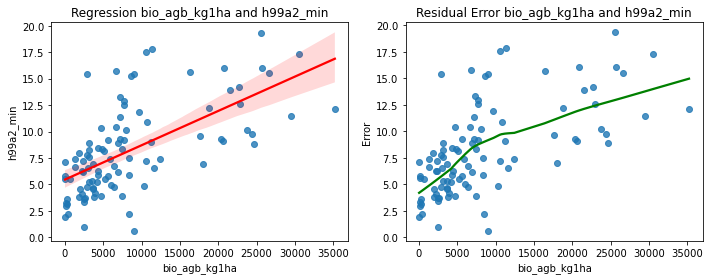

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


h99a2_max


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


slope:  0.00039610765163533205
intersept:  10.145124601779731
r2:  0.6737716240035542
P_value:  2.1323757165963318e-14
std error:  4.410863472817899e-05


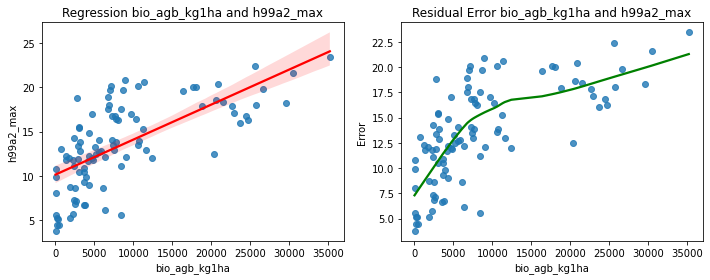

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


h99a2_mean
slope:  0.00034470729242357416
intersept:  7.826535967465404
r2:  0.6447162574240948
P_value:  5.962335039275606e-13
std error:  4.149818882974646e-05


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


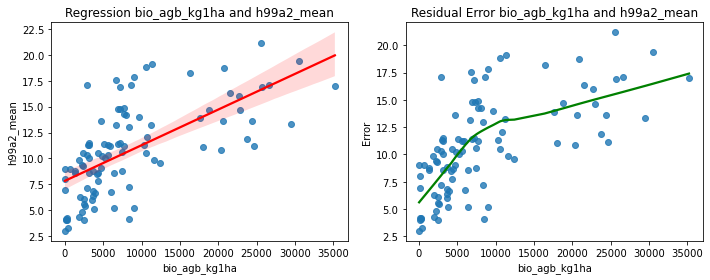

h99a2_med


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


slope:  0.00033725450938655723
intersept:  7.854936839056224
r2:  0.6283874173123809
P_value:  3.3293317238934925e-12
std error:  4.23904954154003e-05


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


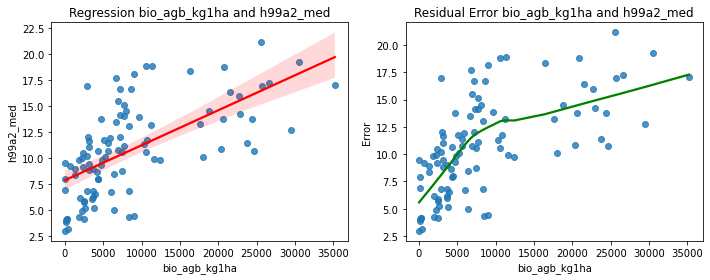

h99a2_std
slope:  1.6983386448524595e-05
intersept:  1.2514428388651848
r2:  0.20454342928539937
P_value:  0.04226926263915252


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


std error:  8.252249691749332e-06


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


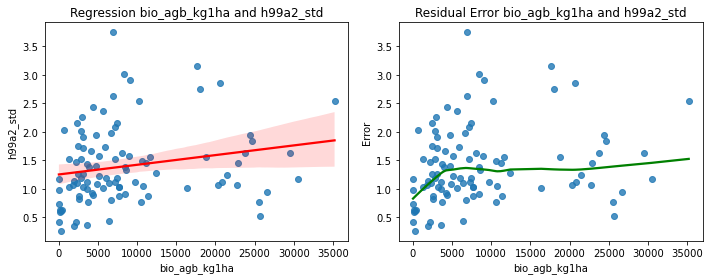

h99a2_p25
slope: 

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


 0.000335834701989604
intersept:  6.985735399900824
r2:  0.6376063431204054
P_value:  1.2767743925806293e-12
std error:  4.11985682600268e-05


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


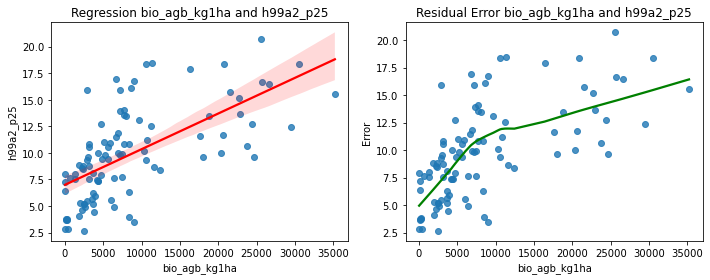

h99a2_p50
slope:  0.00033725450938655723
intersept:  7.854936839056224
r2:  0.6283874173123809
P_value:  3.3293317238934925e-12
std error:  4.23904954154003e-05


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


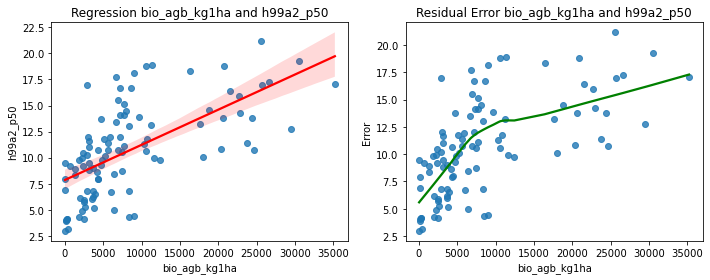

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


h99a2_p75
slope:  0.00035435459259460926
intersept:  8.679991166682898
r2:  0.6374556672287246
P_value:  1.2972682304095604e-12
std error:  4.348781102166634e-05


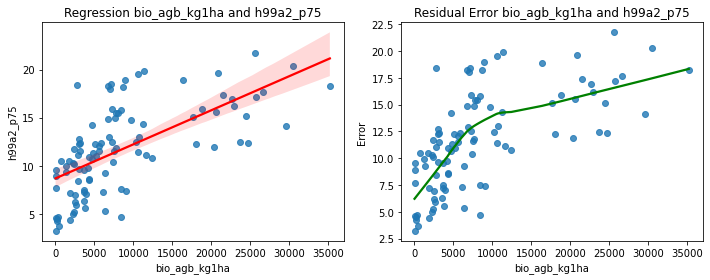

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


h99a2_p95
slope:  0.00037234435909094636
intersept:  9.635181032202942
r2:  0.6528991924604612
P_value:  2.4205582697447375e-13
std error:  4.3859510058437294e-05


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


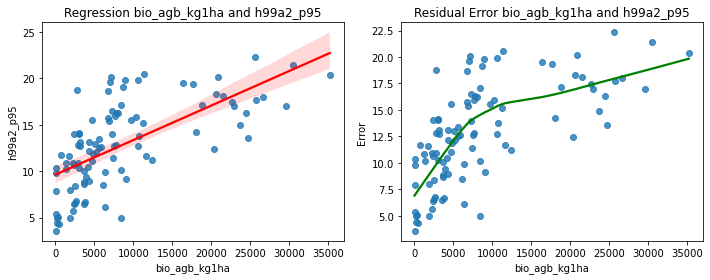

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


h99a2_p99
slope:  0.0003914568162761834
intersept:  10.039101487648999
r2:  0.671619296371722
P_value:  2.7644105749604257e-14
std error:  4.384623725814175e-05


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


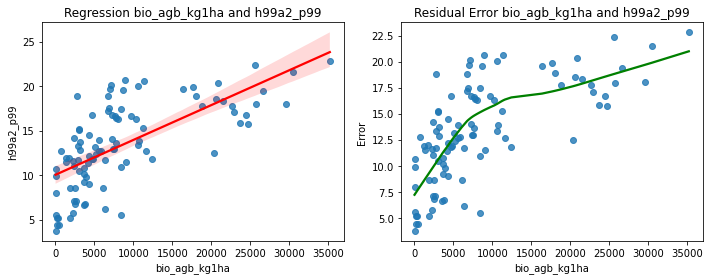

fpca2_min
slope:  0.000783830187225016
intersept:  1.6233216725956918
r2:  0.7029208908311312
P_value:  5.050966113473471e-16
std error:  8.053097560363372e-05


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


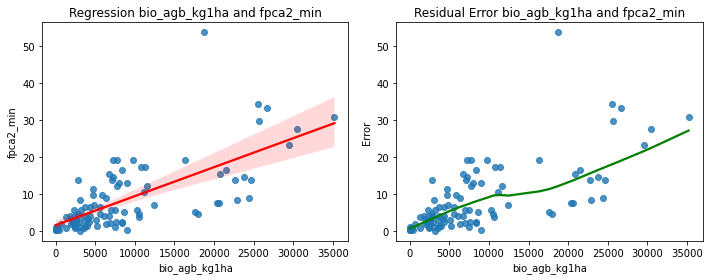

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


fpca2_max
slope:  0.0011723739463588084
intersept:  10.059913841361297
r2:  0.7257782959187177
P_value:  1.925239012416495e-17
std error:  0.00011282873755340351


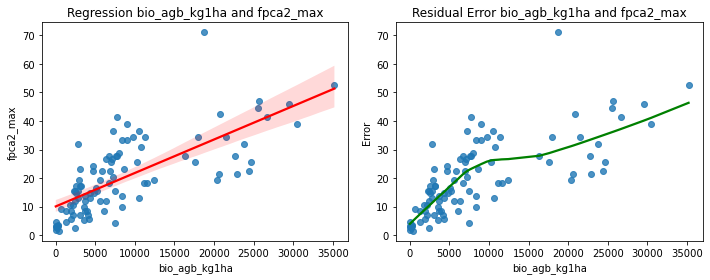

fpca2_mean
slope:  0.0009881648603924222
intersept:  4.977828700862981
r2:  0.7365692226509979
P_value:  3.6642834654742986e-18
std error:  9.213174089199445e-05


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


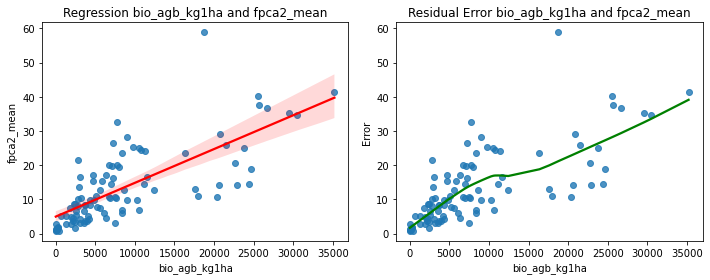

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


fpca2_med
slope:  0.000985331102114862
intersept:  4.7280731513675445
r2:  0.7237856375418648
P_value:  2.5930147258099413e-17
std error:  9.537863899628657e-05


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


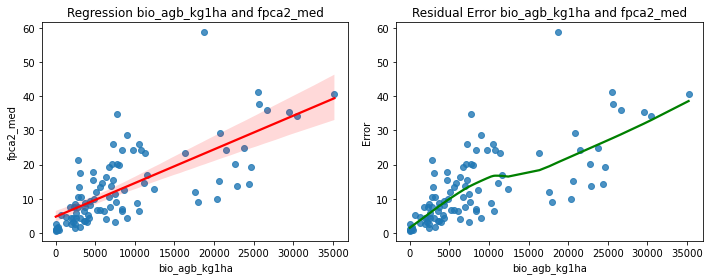

fpca2_std


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


slope:  0.0001005155150432796
intersept:  2.2944818008694283
r2:  0.4209725853994841
P_value:  1.4323893841681931e-05
std error:  2.199053692757985e-05


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


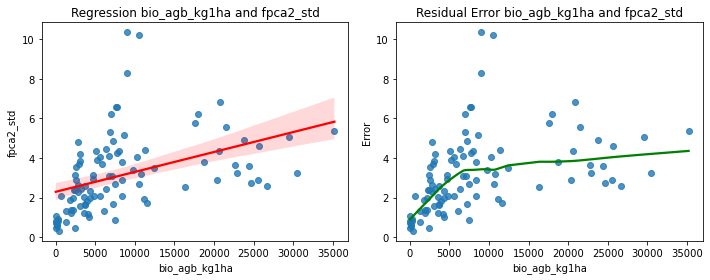

fpca2_p25
slope: 

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


 0.0009207338664976408
intersept:  3.4758618914005366
r2:  0.7178428235742605
P_value:  6.207051272218166e-17
std error:  9.066844142557812e-05


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


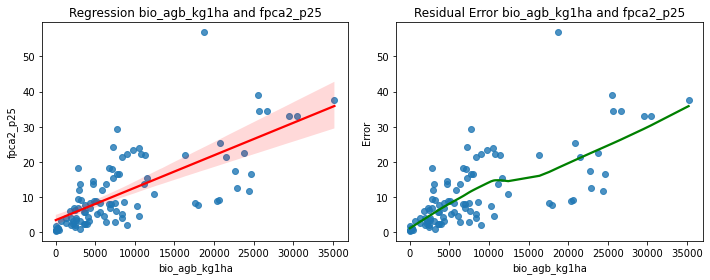

fpca2_p50
slope:  0.000985331102114862
intersept:  4.7280731513675445
r2:  0.7237856375418648
P_value:  2.5930147258099413e-17
std error:  9.537863899628657e-05


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


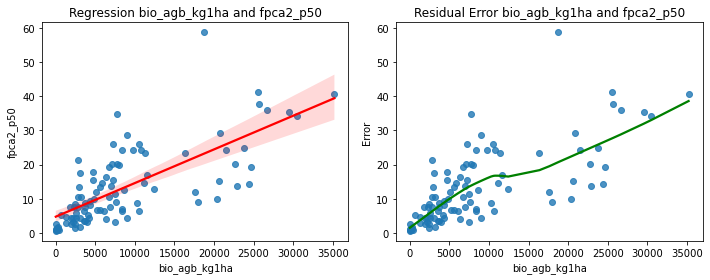

fpca2_p75
slope:  0.0010454372220141293
intersept:  6.396864036472378
r2:  0.729852959589473
P_value:  1.0386926106570922e-17
std error:  9.942175376086619e-05


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


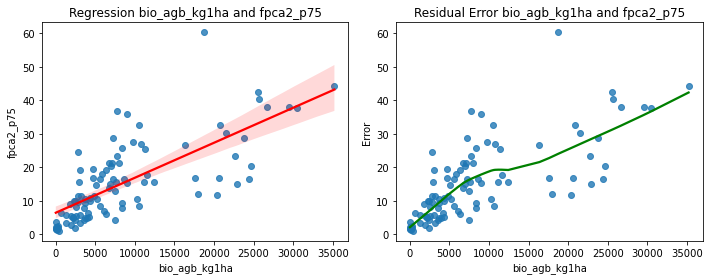

fpca2_p95
slope:  0.0011497400652273214
intersept:  8.419032030791257
r2:  0.7384417518119052
P_value:  2.7250115635806535e-18
std error:  0.00010660113688967251


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


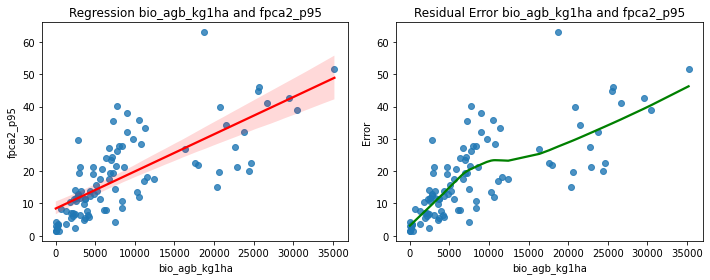

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


fpca2_p99
slope:  0.0011674926516797815
intersept:  9.727759782971177
r2:  0.7299154987836716
P_value:  1.0288118128887346e-17
std error: 

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


 0.00011100894608658613


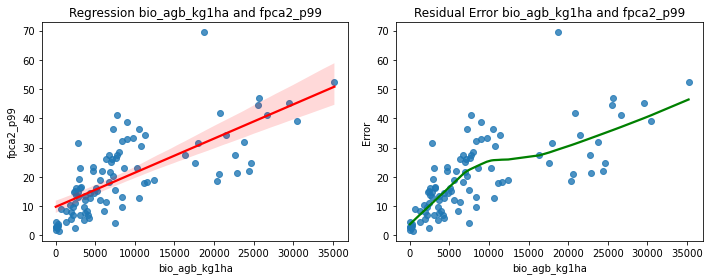

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ratio32m
slope: 

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


 -113.65737077469497
intersept:  15017339.887676548
r2:  -0.5598206798526612
P_value:  1.699831569266228e-09
std error:  17.081065397683187


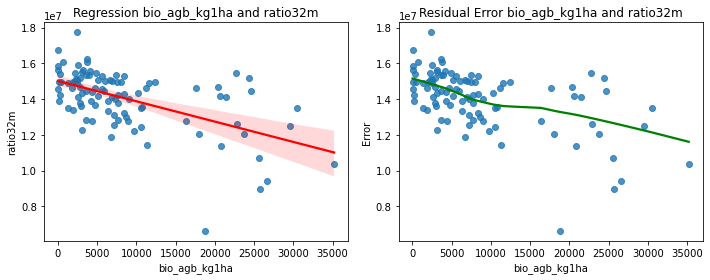

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ratio42m
slope:  707.3161666093397
intersept:  29142287.707079064
r2:  0.6479236008034102
P_value:  4.201271558595015e-13
std error:  84.42885734669717


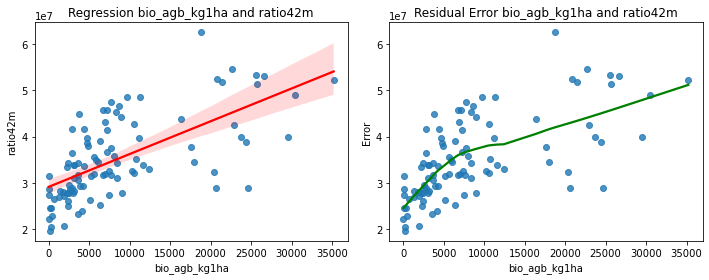

ratio43m
slope:  864.313541552777
intersept:  18786975.319140047
r2:  0.6206174682279817
P_value: 

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


 7.288202660205793e-12
std error:  110.87672204021868


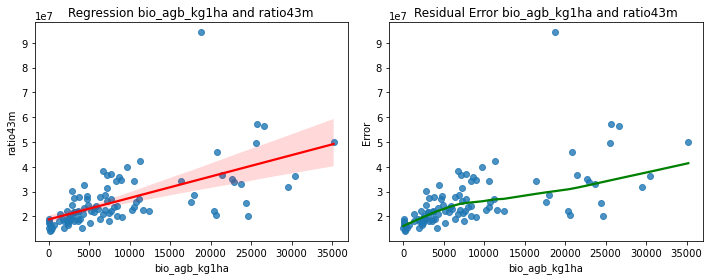

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ratio52m
slope:  163.0564176656273
intersept:  35998922.60057149
r2:  0.20488107388357413
P_value:  0.0419229016474496
std error:  79.09305024433704


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


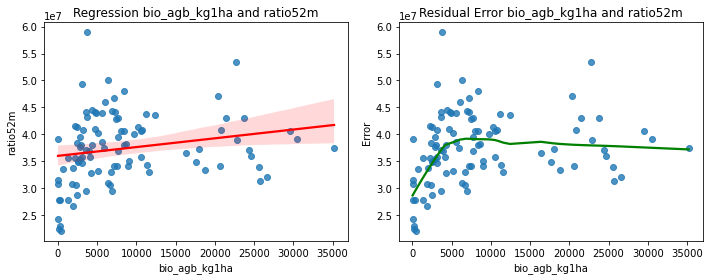

ratio53m
slope: 

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


 376.3373148097114
intersept:  23818813.137419783
r2:  0.5309457924923714
P_value:  1.5729212288733963e-08
std error:  60.986351980555945


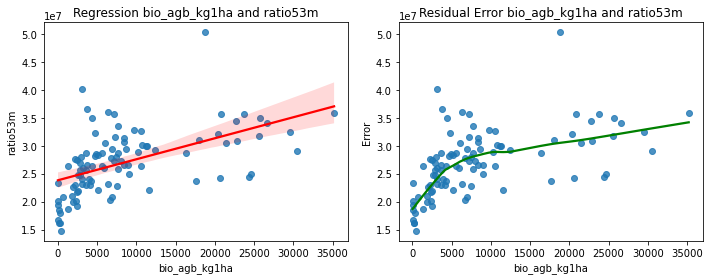

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ratio54m
slope:  -133.43550381860018
intersept:  12158297.732854757
r2:  -0.5114184403376034
P_value:  6.318931237448235e-08
std error:  22.765125207679024


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


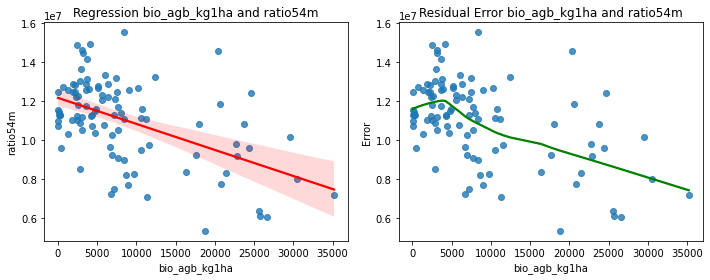

ratio62m
slope:  -102.25956835606046
intersept:  23543350.313538484
r2:  -0.18311560219358686
P_value:  0.06964534242901116
std error:  55.74252406072147


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


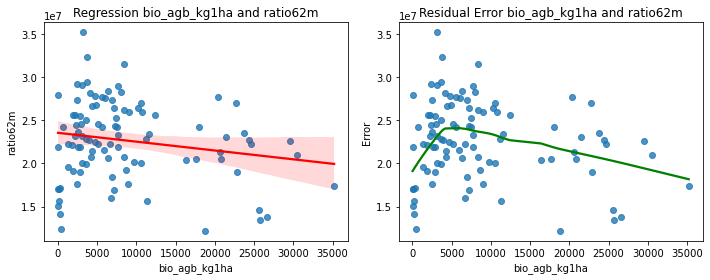

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ratio63m
slope:  55.73611643440951
intersept:  15684624.902295234
r2:  0.1684168291701398
P_value:  0.09563977882321906
std error:  33.122041640463124


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


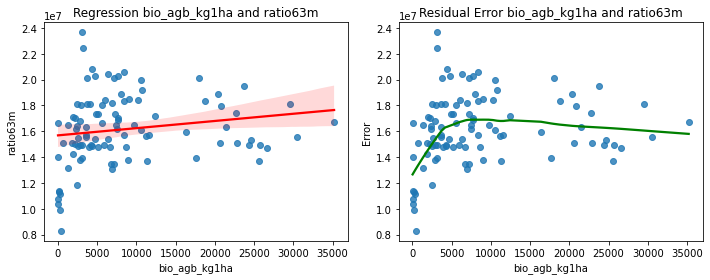

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ratio64m
slope:  

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


-132.07372727343656
intersept:  7971161.560696085
r2:  -0.5386023159245331
P_value:  8.898171700828944e-09
std error:  20.97795969850781


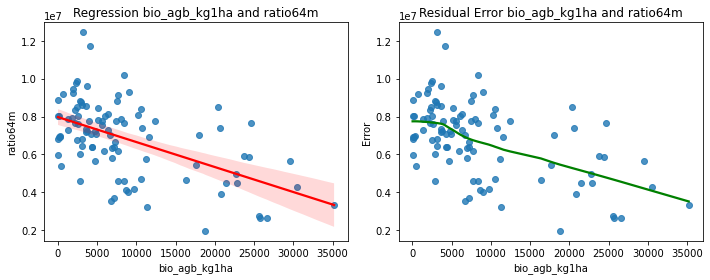

ratio65m
slope:  -56.21016934000393
intersept:  6573544.285359425
r2:  -0.5069311521299762
P_value:  8.593073275460258e-08
std error:  9.70466467558658


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


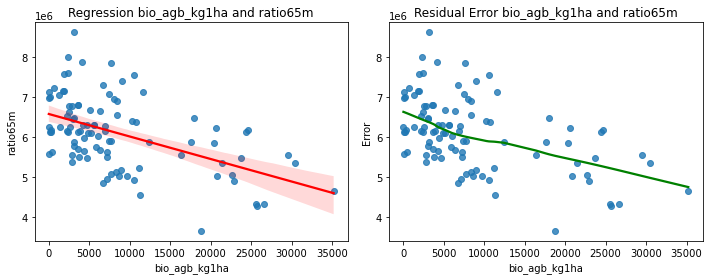

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


GSAVIm
slope: 

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


 13.85117894475621
intersept:  2811363.7290909076
r2:  0.2858487522006775
P_value:  0.0041289488642002195
std error:  4.714705994785152


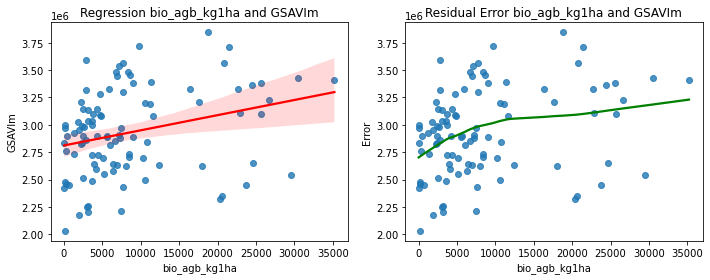

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


GNDVIm
slope:  65.25538090133776
intersept:  4854691.726141388
r2:  0.6183633883162687
P_value:  9.111346612852724e-12
std error:  8.42072979368826


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


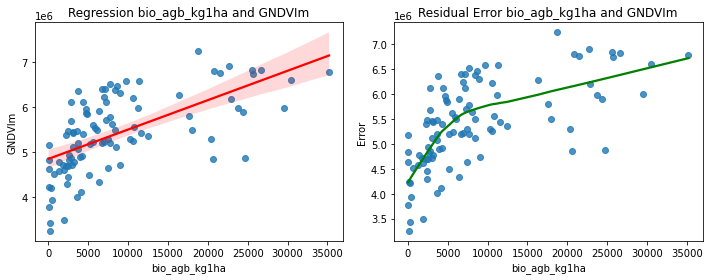

CVIm
slope:  482.3944445720018
intersept:  44424231.800371036
r2:  0.4036271538442786
P_value:  3.4321687901770315e-05
std error:  111.02502156088597


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


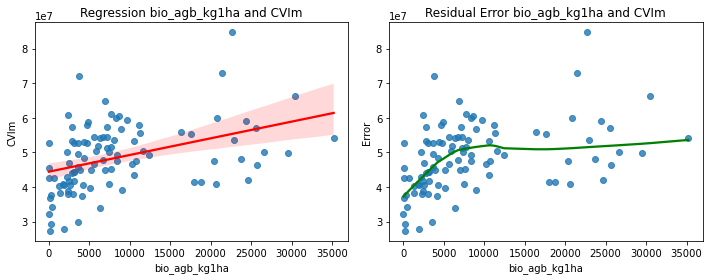

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


NDGIm
slope:  44.701059613624665
intersept:  -2020897.2317927133
r2:  0.5484928086161094
P_value:  4.172817964629706e-09
std error:  6.919073520595404


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


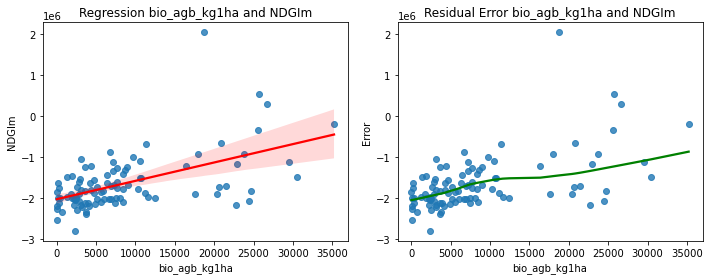

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


RIm
slope: 

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


 -44.701059613624665
intersept:  2020897.2317927133
r2:  -0.5484928086161094
P_value:  4.172817964629706e-09
std error:  6.919073520595404


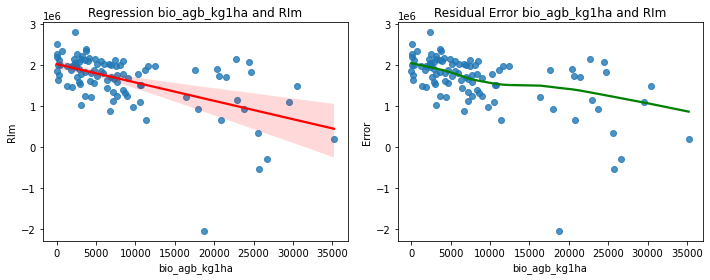

NBRm


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


slope:  105.97176538952661
intersept:  1146627.6845457652
r2:  0.5661767980562307
P_value:  1.0117544086142313e-09
std error:  15.664950066593745


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


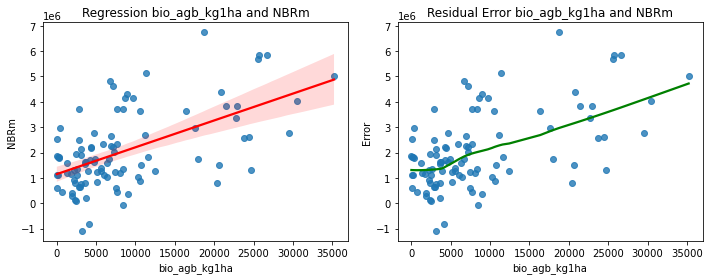

NDIIm
slope:  69.65167898957532
intersept:  -974972.2370926775
r2:  0.5382335053068528
P_value:  9.14871214089608e-09
std error:  11.073816828681819


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


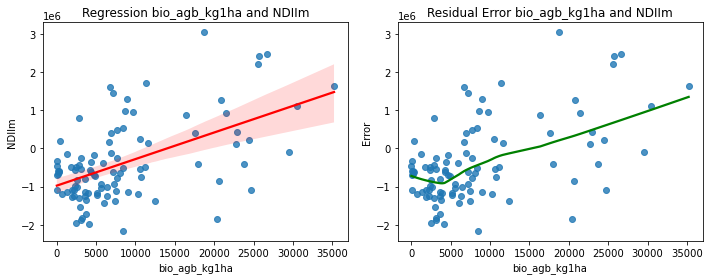

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


GDVIm
slope:  0.5511943279307715
intersept:  1540805.8748415615
r2:  0.019090802983399498
P_value:  0.8512249187142895
std error:  2.9309979945476443


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


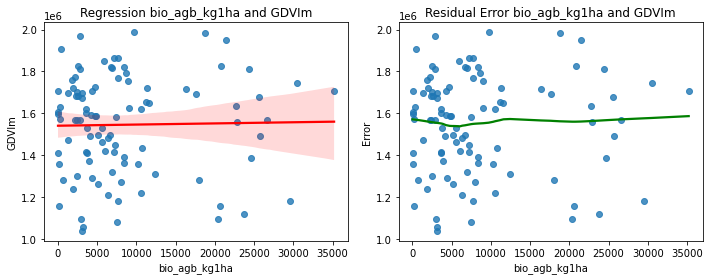

MSAVIm
slope:  34.293095069649034
intersept:  1747474.4251440978
r2:  0.5137848874663898
P_value:  5.363647543951844e-08
std error:  5.814144215820885


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


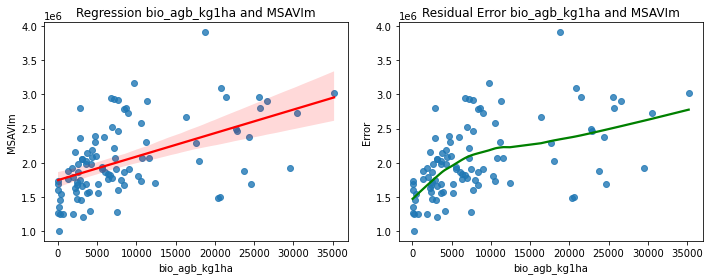

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


DVIm
slope:  13.810617051671487
intersept:  1134500.7998127732
r2:  0.396482309266146
P_value:  4.85166719760527e-05
std error:  3.24687914322878


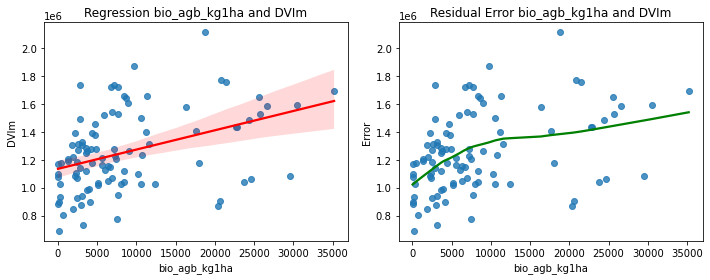

SAVIm
slope:  39.031881443195836
intersept:  1978219.8400798712
r2:  0.5457819121126837
P_value:  5.147914654814761e-09
std error:  6.084442668121462


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


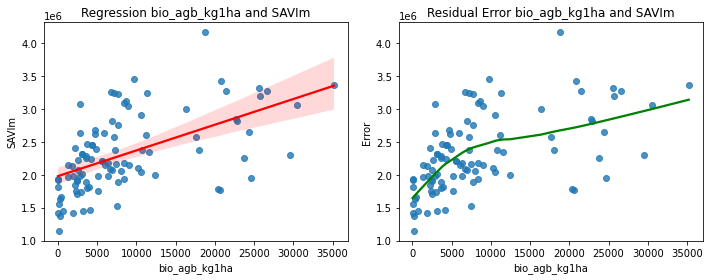

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


NDVIm
slope:  107.66380180297007
intersept:  3181829.0624176366
r2:  0.6734458988837763
P_value:  2.2181236999320997e-14
std error:  11.999538438517725


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


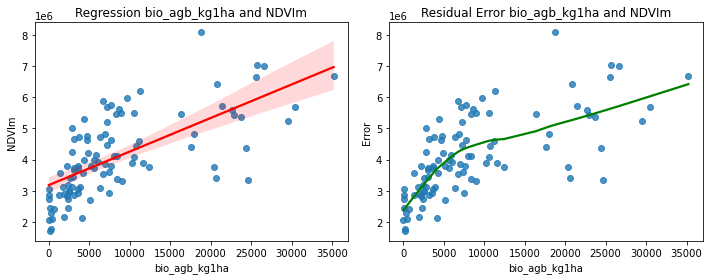

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


MSRm
slope:  243.42842168863967
intersept:  3819055.563771873
r2:  0.6563651778253812
P_value:  1.6385302026482592e-13
std error:  28.40969118132914


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


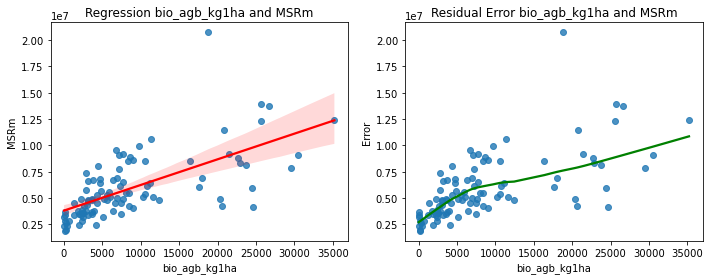

In [61]:
for i in df.columns[1:]:
    print(i)
    value_x = 'bio_agb_kg1ha'
    value_y_loop = str(i)
    plt.figure(figsize=(10,4))
    # left plot
    plt.subplot(1,2,1)
    sns.regplot(df[value_x], df[value_y_loop], line_kws={"color":"red"})
    plt.xlabel(value_x)
    plt.ylabel(value_y_loop)
    plt.title("Regression {0} and {1}".format(value_x, value_y_loop))
    
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df[value_x], df[value_y_loop])

    print("slope: ", slope)
    print("intersept: ", intercept)
    print("r2: ", r_value)
    print("P_value: ", p_value)
    print("std error: ", std_err)

    # right plot
    plt.subplot(1,2,2)
    sns.regplot(df[value_x], df[value_y_loop], lowess=True, line_kws={"color":"green"})
    plt.xlabel(value_x)
    plt.ylabel("Error")
    plt.title("Residual Error {0} and {1}".format(value_x, value_y_loop))
    plt.tight_layout()
    plt.show()
    
#     slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df[value_x], df[value_y])

#     print("slope: ", slope)
#     print("intersept: ", intercept)
#     print("r2: ", r_value)
#     print("P_value: ", p_value)
#     print("std error: ", std_err)

slope:  243.4284216884388
intersept:  3819055.56376293
r2:  0.6563651778318847
P_value:  1.6385302014407442e-13
std error:  28.409691180811137


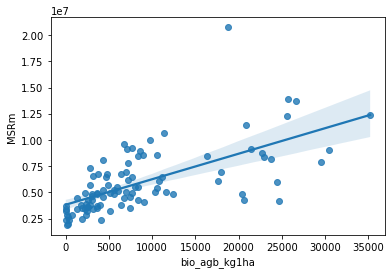

In [46]:
# value_x = 'bio_agb_kg1ha'
# value_y = 'b2_dbi_mean'
sns.regplot(x= value_x, y=value_y, data=df)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df[value_x], df[value_y])

print("slope: ", slope)
print("intersept: ", intercept)
print("r2: ", r_value)
print("P_value: ", p_value)
print("std error: ", std_err)

slope:  243.42842168863967
intersept:  3819055.563771873
r2:  0.6563651778253812
P_value:  1.6385302026482592e-13
std error:  28.40969118132914


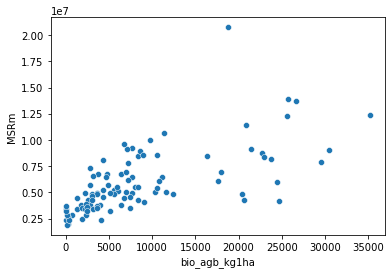

In [62]:
# value_x = 'bio_agb_kg1ha'
# value_y = 'b3_dbi_mean'
sns.scatterplot(x= value_x, y=value_y, data=df)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df[value_x], df[value_y])

print("slope: ", slope)
print("intersept: ", intercept)
print("r2: ", r_value)
print("P_value: ", p_value)
print("std error: ", std_err)

In [63]:
# randomly split data into train and test datasets, the user needs to define the variables 

# Two example of how you can call the predictor variables 

#xdata1 = df4[df4.columns[12:]].astype('float32')

#xdata1 = df[['psB2a', 'psB3a', 'psB4a', 'psB5a', 'psB6a', 'ratio32a', 'ratio42a', 'ratio43a', 'ratio52a', 'ratio53a', 'ratio54a', 'ratio62a', 'ratio63a', 'ratio64a', 'ratio65a', 'GSAVIa', 'GNDVIa', 'CVIa', 'NDGIa', 'RIa', 'NBRa', 'NDIIa', 'GDVIa', 'MSAVIa', 'DVIa', 'SAVIa', 'NDVIa', 'MSRa', 'psB2d', 'psB3d', 'psB4d', 'psB5d', 'psB6d', 'ratio32d', 'ratio42d', 'ratio43d', 'ratio52d', 'ratio53d', 'ratio54d', 'ratio62d', 'ratio63d', 'ratio64d', 'ratio65d', 'GSAVId', 'GNDVId', 'CVId', 'NDGId', 'RId', 'NBRd', 'NDIId', 'GDVId', 'MSAVId', 'DVId', 'SAVId', 'NDVId', 'MSRd']].astype('float32')
#xdata1 = df[['psB1a', 'psB2a', 'psB3a', 'psB4a', 'psB5a', 'psB6a', 'ratio32fa', 'ratio42fa', 'ratio43fa', 'ratio52fa', 'ratio53fa', 'ratio54fa', 'ratio62fa', 'ratio63fa', 'ratio64fa', 'ratio65fa', 'ratio32a', 'ratio42a', 'ratio43a', 'ratio52a', 'ratio53a', 'ratio54a', 'ratio62a', 'ratio63a', 'ratio64a', 'ratio65a', 'GSAVIfa', 'GSAVIa', 'GNDVIfa', 'GNDVIa', 'CVIfa', 'CVIa', 'NDGIfa', 'NDGIa', 'RIfa', 'RIa', 'NBRfa', 'NBRa', 'NDIIfa', 'NDIIa', 'GDVIfa', 'GDVIa', 'MSAVIfa', 'MSAVIa', 'DVIfa', 'DVIa', 'SAVIfa', 'SAVIa', 'NDVIfa', 'NDVIa', 'MSRfa', 'MSRa']]
xdata1 = df.iloc[:, 1:].astype('float32')
ydata1 = df[[value_x]].astype('float32')
ydata2 = ydata1.values
ydata = ydata2.ravel()

X_1, X_2, y_1, y_2 = train_test_split(xdata1, ydata, train_size=0.70)  
         
print(X_1.shape, y_1.shape)
print(X_2.shape, y_2.shape)

(69, 161) (69,)
(30, 161) (30,)


### Plot up Histograms of Lidar meanCHM for train and test datasets

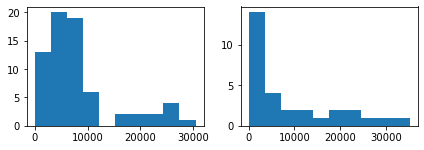

In [64]:
plt.subplot(2, 2, 1)
plt.hist(y_1)
plt.subplot(2, 2, 2)
plt.hist(y_2)
plt.tight_layout()

### Parameterise the Random Forest Regressor alogorthim

for details see: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [67]:
rng = np.random.RandomState(1)
rfrModel_1 = abr(dtr(max_depth=4), n_estimators=300, random_state=rng)
rfrModel_1

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4),
                  n_estimators=300,
                  random_state=RandomState(MT19937) at 0x168D4F5FD08)

In [66]:
rfrModel_1 = gbr(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=0, loss='ls')
rfrModel_1

GradientBoostingRegressor(loss='ls', max_depth=4, random_state=0)

In [52]:
# rfrModel_1 = etr(n_estimators=100, bootstrap=True, oob_score=True,  max_features='log2', min_samples_split=1,n_jobs=-1) 
# rfrModel_1

In [53]:
# rfrModel_1 = rfr(n_estimators=100, oob_score=True,  max_depth=None, max_features='log2', min_samples_split=1.0,n_jobs=-1) 
# rfrModel_1,

In [54]:
# rfrModel_1 = rfr(n_estimators=100, oob_score=True) #,  max_depth=None, max_features='log2', min_samples_split=1.0,n_jobs=-1) 
# rfrModel_1,

In [55]:
np.nan_to_num(X_1)

array([[6.000000e+00, 1.700000e+01, 1.118750e+01, ..., 2.130245e+06,
        3.120958e+06, 3.810799e+06],
       [1.500000e+01, 2.800000e+01, 2.268750e+01, ..., 2.201922e+06,
        3.991062e+06, 5.259015e+06],
       [4.000000e+00, 1.000000e+01, 8.200000e+00, ..., 1.915301e+06,
        3.046853e+06, 3.698159e+06],
       ...,
       [1.100000e+01, 1.600000e+01, 1.370000e+01, ..., 2.141831e+06,
        3.555887e+06, 4.503819e+06],
       [2.000000e+01, 2.600000e+01, 2.420000e+01, ..., 2.471669e+06,
        4.725439e+06, 6.708635e+06],
       [1.300000e+01, 3.000000e+01, 2.540000e+01, ..., 2.607477e+06,
        4.611570e+06, 6.467108e+06]], dtype=float32)

### Fit random forest regressor model and compute variable importance score 

may need to restrict the number of variables for the bar graph to be legible



In [68]:
rfrLCHM = rfrModel_1.fit(X_1, y_1)

##### good info on the feature importance score - http://stackoverflow.com/questions/15810339/how-are-feature-importances-in-randomforestclassifier-determined

Fitted model r2 = 0.97
Fitted model mse = 1382473.34
n = 69


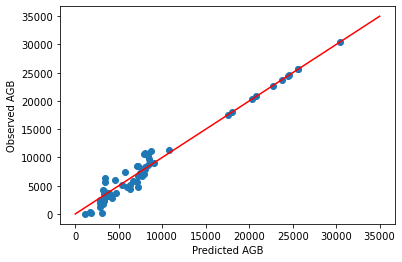

In [69]:
feature_importance = rfrModel_1.feature_importances_

### TRY THIS
# use "feature importance" scores to see what the top 10 important features are
fi = enumerate(rfrModel_1.feature_importances_)
cols = xdata1.columns
fiResult = [(value,cols[i]) for (i,value) in fi]
#fiResult = [(value,cols[i]) for (i,value) in fi if value > 0.001]
## Change the value 0.04 which we picked empirically to give us 10 variables
## try running this code after changing the value up and down so you get more or less variables
## do you see how this might be useful in refining the model?
## Here is the code in case you mess up the line above
## [(value,cols[i]) for (i,value) in fi if value > 0.04]
#print fiResult

print('Fitted model r2 =' ,  format(rfrLCHM.score(X_1, y_1), '.2f'))
print('Fitted model mse =', format(np.mean((y_1 - rfrLCHM.predict(X_1))**2), '.2f'))
print('n =', len(y_1))
plt.scatter(rfrLCHM.predict(X_1), y_1,)  
# data for the 1 for 1 line
x = [0,35000]
y = [0,35000]

#sets the limits of the axis
#plt.xlim(-1,35)
#plt.ylim(-1,35)

plt.ylabel('Observed AGB')

plt.xlabel('Predicted AGB')

# 1 for 1 line

plt.plot(x, y, color = 'r')
plt.show()

            band                       n
92   b3_dim_mean   7.104357508507002e-05
139     ratio42m     0.04820387784943338
149       GNDVIm    0.047736935562522335
127    h99a2_p99     0.04397520509044628
4     b1_dja_std     0.04309039836458375
..           ...                     ...
57    b5_dbi_p75  0.00025620611438378595
53    b5_dbi_med  0.00023171235662124693
106      dka_min   0.0002154427201800106
39    b3_dbi_p99  0.00018664097299627794
56    b5_dbi_p50  0.00011744391554848142

[161 rows x 2 columns]


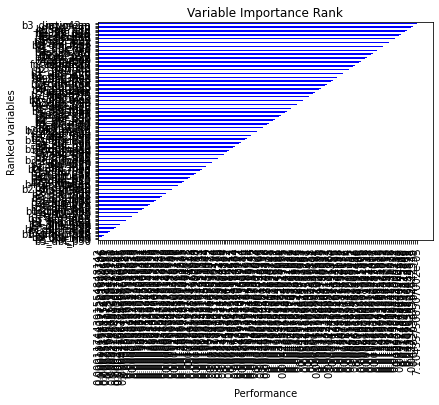

In [71]:
fiResult = np.array(fiResult)
score = (fiResult[:,0])
band = fiResult[:,1]
a = fiResult[np.argsort(fiResult[:, 1])]

df_band = pd.DataFrame(dict(band=band,n=score))
df_band['n'].astype('float')
dfsort = df_band.sort_values(['n'], ascending=[False])
print(dfsort)
 
## my complicated way to get the bar plot to sort in ascending order and display the assocated band names in the y axis
dfsort2 = df_band.sort_values(['n'], ascending=[True])
b = dfsort2[['band']]
c = b.values.tolist()
# convert the list of band names in the correct order to a string
e = str(c)
# strips all the rubbish from the string
f = e.replace('[','').replace(']','').replace("'",'').replace(",",' ')
# convert the cleaned up string back into a list to plot the band names in the bar graph
g = f.split()
 
ind = np.arange(len(df_band))
width = 0.4
 
fig, ax = plt.subplots()
ax.barh(ind, dfsort2.n, width, color='blue')
ax.set(yticks=ind + width, yticklabels= g, ylim=[2*width - 1, len(df_band)])
ax.set_xlabel('Performance')
ax.set_ylabel('Ranked variables')
plt.xticks(rotation='vertical')
ax.set_title('Variable Importance Rank')

plt.show()
fig.savefig('Band_Importance_Score.pdf',dpi=600)# save out your figure to a pdf 

In [72]:
df_band.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   band    161 non-null    object
 1   n       161 non-null    object
dtypes: object(2)
memory usage: 2.6+ KB


In [73]:
dfsort['n'].astype('float')
dfsort.info()
dfsort['n'] = dfsort['n'].astype('float')
dfsort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161 entries, 92 to 56
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   band    161 non-null    object
 1   n       161 non-null    object
dtypes: object(2)
memory usage: 3.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 161 entries, 92 to 56
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   band    161 non-null    object 
 1   n       161 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.8+ KB


In [74]:
df_var = dfsort[dfsort['n'] > 0.01]

In [75]:
column_var = df_var.band.tolist()

In [76]:
column_var.insert(0, 'bio_agb_kg1ha')

In [77]:
column_var

['bio_agb_kg1ha',
 'ratio42m',
 'GNDVIm',
 'h99a2_p99',
 'b1_dja_std',
 'h99a2_min',
 'b2_dbi_p25',
 'fpca2_min',
 'b5_dbi_std',
 'fpca2_p95',
 'stc_mean',
 'b1_dbi_p99',
 'fpca2_p25',
 'h99a2_max',
 'b1_dbi_p95',
 'b2_dbi_max',
 'b2_dbi_p99',
 'b3_dbi_p25',
 'b1_dbi_min',
 'CVIm',
 'b3_dim_std',
 'fpca2_std',
 'fpca2_p50',
 'fpca2_p99',
 'b2_dbi_min']

In [ ]:
df

In [ ]:
df = df_ml[column_var]

In [ ]:
df_corr = df.corr()
df_corr

In [ ]:
dfsort.to_csv(os.path.join(output_, "rf_variable_score.csv"))

In [ ]:
variable_imp_list = dfsort.band.to_list()

In [ ]:
# var_not_imp = variable_imp_list[20:]
# print(list(var_not_imp))

### Predict the selected model on the test data

In [ ]:
# plt.scatter(y2_predict, y_2)
# plt.show()

In [ ]:
y2_predict = rfrLCHM.predict(X_2)

print('Predicted data r2 =', rfrLCHM.score(X_2, y_2))
print('MSE =', format(np.mean((y_2 - rfrLCHM.predict(X_2))** 2), '.3f'))
print('RMSE =', format(np.sqrt(np.mean((y2_predict - y_2) ** 2)), '.3f'))
#print 'explained_var =',format(explained_variance_score(y_2, y2_predict),  '.3f') 
print('bias =' , format(np.mean(y_2) - np.mean(y2_predict), '.3f'))
print('n =' , len(y_2))

plt.scatter(y2_predict, y_2 ,s=10, c='b', marker='o')
# data for the 1 for 1 line
x = [-1,30000]
y = [-1,30000]

#sets the limits of the axis
plt.xlim(-1,30000)
plt.ylim(-1, 30000)
plt.ylabel('Observed mean AGB')
plt.xlabel('Predicted mean AGB')
# 1 for 1 line
plt.plot(x, y, color = 'r')

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = y2_predict
y = y_2

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

print(x)
print(y)
print(z)
# fig, ax = plt.subplots()
# ax.scatter(x, y, c=z, s=0.8, edgecolor='')

# # data for the 1 for 1 line
# a = [-1,25]
# b = [-1,25]

# #sets the limits of the axis
# plt.xlim(-1,25)
# plt.ylim(-1,25)
# plt.ylabel('Observed mean CHM')
# plt.xlabel('Predicted mean CHM')
# # 1 for 1 line
# ax.plot(a, b, color = 'black')

# plt.show()

# =================================================================

# STOP - do you realy want to save this model?

# remember to change the cPickle file name !!

# Save current fitted model and apply to unseen validation data 

In [ ]:
import pickle

#rfrL8CHM = rfr()
#rfrL8CHM.fit(X_1, y_1)

with open('rfr_modelName_nt100_n17', 'wb') as f:
    pickle.dump(rfrLCHM, f)

In [ ]:
# read in your validation dataset which has never been seen by rfr model - NOTE in this example I am just reading the same data used to train the model

df = pd.read_csv(csv_file, header=0)
df.shape 

In [ ]:
c_list = df.columns.tolist()
c_list

In [ ]:
#df1 = df[(df['comp'] == 'l57')]
df1 = df[(df['bio_agb_kg1ha'] > 0.01)]
df1.dropna(inplace=True)
print (df1.shape)

In [ ]:
df1.columns

In [ ]:
column_var

In [ ]:
df1[column_var].info()

In [ ]:
df1

In [ ]:
xdata2 = df1[column_var].astype('float32')

ydata1 = df1[['bio_agb_kg1ha']].astype('float32')

ydata2 = ydata1.values

ydata = ydata2.ravel()

print(len(ydata1))

In [ ]:
with open('rfr_modelName_nt100_n17', 'rb') as f:
        rf = pickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print('Predicted data r2 =', rf.score(xdata2, ydata))
print('MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f'))
print('RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f'))
print('explained_var =',format(explained_variance_score(ydata, predicted),  '.3f'))
print('bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f'))
print('n =' , len(ydata))


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=8, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,40000]
y = [-1,40000]

#sets the limits of the axis
plt.xlim(-1, 40000)
plt.ylim(-1, 40000)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validation_78.png',dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = predicted
y = ydata

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.5, edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

In [ ]:
with open('rfr_modelName_mKath', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validation_l57.png',dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = predicted
y = ydata

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.5, edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

In [ ]:
with open('rfr_modelNamel57', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validation.png',dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = predicted
y = ydata

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.5, edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

In [ ]:
with open('rfr_modelNamel57', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validationgtr4m.png',dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = predicted
y = ydata

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.5, edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

In [ ]:
with open('rfr_modelNamel78', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validation.png',dpi=600)
plt.show()